In [104]:
%pylab inline
import gym
import numpywren as npyw
import numpywren
from numpywren import matrix, matrix_utils
import boto3
from io import BytesIO
import numpy as np
import pywren
import blobprost
from importlib import reload
import scipy.sparse
import pywren.wrenconfig as wc
from sklearn.linear_model import SGDClassifier
from sklearn import metrics 
import time
import pylab as pl
from IPython import display
from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython.display import display
reload(blobprost)

Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['matrix']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<module 'blobprost' from '/home/ubuntu/lstsq/featurization/blobprost.py'>

In [59]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    #plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi = 72)
    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    display(display_animation(anim, default_mode='loop'))

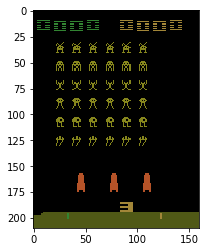

In [7]:
imshow(state)

In [15]:
num_episodes = 100
number_to_sample = 1024

In [22]:
X_train_bigm = matrix.BigMatrix("space_invader_states_train", shape=[num_episodes*number_to_sample, 210, 160, 3], shard_sizes=[number_to_sample, 210, 160, 3], dtype="uint8")
y_train_bigm = matrix.BigMatrix("space_invader_actions_rewards_train", shape=[num_episodes*number_to_sample, 2],  shard_sizes=[number_to_sample, 2], dtype="uint8")



In [114]:
d

NameError: name 'd' is not defined

In [18]:
def blob_batch(X_train_bigm, block_idx, *blob_args, **blob_kwargs):
    states = X_train_bigm.get_block(block_idx,0,0,0)
    print("Downloaded now featurizing")
    all_features = []
    for i in range(states.shape[0]):
        all_features.append(blobprost.blob(states[i], *blob_args, **blob_kwargs))
    return scipy.sparse.vstack(all_features)

In [20]:
conf = wc.default()
conf['runtime']['s3_bucket'] = "pictureweb"
conf['runtime']['s3_key'] = "pywren.runtime/pywren_runtime-3.6-atari.tar.gz"
pwex_standalone = pywren.standalone_executor(config=conf, job_max_runtime=1000)

In [ ]:
futures = pwex_standalone.map(lambda x: blob_batch(X_train_bigm, x, bins_per_color=2), X_train_bigm._block_idxs(0))
pywren.wait(futures)
features = scipy.sparse.vstack([f.result() for f in futures])

MODULE PATHS ['/home/ubuntu/numpywren/numpywren', 'blobprost.py', '/home/ubuntu/pywren/pywren']


In [28]:
y = y_train_bigm.numpy()

In [73]:
agent = SGDClassifier(n_iter=100, verbose=3, n_jobs=10)

In [75]:
%time agent.fit(features, y[:, 0])

-- Epoch 1-- Epoch 1
-- Epoch 1
-- Epoch 1-- Epoch 1


-- Epoch 1
Norm: 41434.67, NNZs: 87367, Bias: -0.429378, T: 102400, Avg. loss: 3714563.808687
Total training time: 2.11 seconds.
-- Epoch 2
Norm: 24045.05, NNZs: 80525, Bias: -0.151937, T: 102400, Avg. loss: 931399.228835
Total training time: 2.19 seconds.
-- Epoch 2
Norm: 57326.64, NNZs: 92842, Bias: -0.327302, T: 102400, Avg. loss: 7887147.124279
Total training time: 2.20 seconds.
-- Epoch 2
Norm: 58674.13, NNZs: 92036, Bias: -0.052695, T: 102400, Avg. loss: 6920903.987153
Total training time: 2.24 seconds.
-- Epoch 2
Norm: 59260.20, NNZs: 91286, Bias: -0.519878, T: 102400, Avg. loss: 7276811.811633
Total training time: 2.35 seconds.
-- Epoch 2
Norm: 61476.81, NNZs: 92237, Bias: -0.262661, T: 102400, Avg. loss: 8628096.681114
Total training time: 2.28 seconds.
-- Epoch 2
Norm: 28283.54, NNZs: 89436, Bias: -0.429400, T: 204800, Avg. loss: 2125993.644616
Total training time: 4.14 seconds.
-- Epoch 3
Norm: 16679.89, NNZs: 83436, Bia

Norm: 16340.54, NNZs: 94838, Bias: -0.261339, T: 1126400, Avg. loss: 1130966.851085
Total training time: 23.68 seconds.
-- Epoch 12
Norm: 7224.23, NNZs: 89132, Bias: -0.154311, T: 1228800, Avg. loss: 112739.663875
Total training time: 23.88 seconds.
-- Epoch 13
Norm: 15569.42, NNZs: 94904, Bias: -0.326393, T: 1126400, Avg. loss: 1061773.946430
Total training time: 23.82 seconds.
-- Epoch 12
Norm: 11429.89, NNZs: 92768, Bias: -0.432087, T: 1228800, Avg. loss: 462038.827390
Total training time: 24.49 seconds.
-- Epoch 13
Norm: 15443.95, NNZs: 93852, Bias: -0.528675, T: 1228800, Avg. loss: 880293.252134
Total training time: 25.22 seconds.
-- Epoch 13
Norm: 14680.01, NNZs: 94776, Bias: -0.050221, T: 1228800, Avg. loss: 832291.447110
Total training time: 25.28 seconds.
-- Epoch 13
Norm: 15660.08, NNZs: 94884, Bias: -0.261757, T: 1228800, Avg. loss: 1047361.275383
Total training time: 25.72 seconds.
Norm: 6943.17, NNZs: 89369, Bias: -0.154626, T: 1331200, Avg. loss: 104966.260036
Total train

Norm: 11172.61, NNZs: 95164, Bias: -0.326352, T: 2150400, Avg. loss: 600529.691470
Total training time: 44.95 seconds.
-- Epoch 22
Norm: 11255.09, NNZs: 94114, Bias: -0.530129, T: 2252800, Avg. loss: 512448.100344
Total training time: 45.92 seconds.
-- Epoch 23
Norm: 10664.57, NNZs: 95188, Bias: -0.050069, T: 2252800, Avg. loss: 484306.423958
Total training time: 45.97 seconds.
-- Epoch 23
Norm: 5334.11, NNZs: 90302, Bias: -0.154914, T: 2355200, Avg. loss: 62780.115280
Total training time: 46.09 seconds.
-- Epoch 24
Norm: 8368.85, NNZs: 93286, Bias: -0.432550, T: 2355200, Avg. loss: 259567.316503
Total training time: 46.95 seconds.
-- Epoch 24
Norm: 11433.91, NNZs: 95039, Bias: -0.262004, T: 2252800, Avg. loss: 610647.388998
Total training time: 46.85 seconds.
-- Epoch 23
Norm: 10898.97, NNZs: 95164, Bias: -0.326306, T: 2252800, Avg. loss: 576212.561667
Total training time: 47.06 seconds.
-- Epoch 23
Norm: 10994.38, NNZs: 94147, Bias: -0.530125, T: 2355200, Avg. loss: 492374.734377
Tot

Norm: 8803.88, NNZs: 95252, Bias: -0.049763, T: 3276800, Avg. loss: 345271.896393
Total training time: 66.92 seconds.
-- Epoch 33
Norm: 7013.28, NNZs: 93496, Bias: -0.432637, T: 3379200, Avg. loss: 187729.479550
Total training time: 67.55 seconds.
-- Epoch 34
Norm: 4446.11, NNZs: 90554, Bias: -0.154906, T: 3481600, Avg. loss: 43933.246240
Total training time: 68.10 seconds.
-- Epoch 35
Norm: 9388.33, NNZs: 95076, Bias: -0.261832, T: 3276800, Avg. loss: 435967.488130
Total training time: 68.14 seconds.
-- Epoch 33
Norm: 9012.96, NNZs: 95220, Bias: -0.326627, T: 3276800, Avg. loss: 412411.071622
Total training time: 68.52 seconds.
-- Epoch 33
Norm: 9137.34, NNZs: 94225, Bias: -0.530255, T: 3379200, Avg. loss: 355424.820194
Total training time: 68.72 seconds.
-- Epoch 34
Norm: 8659.30, NNZs: 95253, Bias: -0.049795, T: 3379200, Avg. loss: 335762.466304
Total training time: 68.99 seconds.
-- Epoch 34
Norm: 6919.71, NNZs: 93496, Bias: -0.432578, T: 3481600, Avg. loss: 182737.001007
Total tra

Norm: 7849.67, NNZs: 95274, Bias: -0.326570, T: 4300800, Avg. loss: 322975.152416
Total training time: 89.67 seconds.
-- Epoch 43
Norm: 3911.38, NNZs: 90747, Bias: -0.154988, T: 4608000, Avg. loss: 33937.953698
Total training time: 89.93 seconds.
-- Epoch 46
Norm: 7558.07, NNZs: 95280, Bias: -0.049675, T: 4403200, Avg. loss: 263974.955244
Total training time: 89.93 seconds.
-- Epoch 44
Norm: 6091.83, NNZs: 93697, Bias: -0.432710, T: 4505600, Avg. loss: 144748.402557
Total training time: 90.03 seconds.
-- Epoch 45
Norm: 8041.52, NNZs: 95097, Bias: -0.261930, T: 4403200, Avg. loss: 333691.835000
Total training time: 91.43 seconds.
-- Epoch 44
Norm: 7878.34, NNZs: 94297, Bias: -0.530210, T: 4505600, Avg. loss: 273646.495064
Total training time: 91.63 seconds.
-- Epoch 45
Norm: 7758.13, NNZs: 95274, Bias: -0.326686, T: 4403200, Avg. loss: 316197.284672
Total training time: 91.77 seconds.
-- Epoch 44
Norm: 3872.00, NNZs: 90747, Bias: -0.155032, T: 4710400, Avg. loss: 33254.075704
Total trai

Norm: 3517.50, NNZs: 90809, Bias: -0.155033, T: 5734400, Avg. loss: 27711.381275
Total training time: 111.47 seconds.
-- Epoch 57
Norm: 5468.96, NNZs: 93718, Bias: -0.432717, T: 5632000, Avg. loss: 118195.811174
Total training time: 112.16 seconds.
-- Epoch 56
Norm: 7205.19, NNZs: 95136, Bias: -0.261912, T: 5427200, Avg. loss: 275928.159076
Total training time: 112.32 seconds.
-- Epoch 54
Norm: 7104.69, NNZs: 94376, Bias: -0.530531, T: 5529600, Avg. loss: 226980.479084
Total training time: 112.47 seconds.
-- Epoch 55
Norm: 6715.21, NNZs: 95289, Bias: -0.049678, T: 5529600, Avg. loss: 214430.773106
Total training time: 112.59 seconds.
-- Epoch 55
Norm: 6967.65, NNZs: 95283, Bias: -0.326849, T: 5427200, Avg. loss: 261783.806190
Total training time: 112.67 seconds.
-- Epoch 54
Norm: 3488.05, NNZs: 90863, Bias: -0.155119, T: 5836800, Avg. loss: 27258.609204
Total training time: 113.47 seconds.
-- Epoch 58
Norm: 5421.39, NNZs: 93718, Bias: -0.432753, T: 5734400, Avg. loss: 116270.592159
Tot

Norm: 3219.11, NNZs: 90979, Bias: -0.155086, T: 6860800, Avg. loss: 23450.611026
Total training time: 133.36 seconds.
-- Epoch 68
Norm: 6379.83, NNZs: 95292, Bias: -0.326957, T: 6451200, Avg. loss: 223839.084963
Total training time: 133.40 seconds.
-- Epoch 64
Norm: 4998.95, NNZs: 93730, Bias: -0.432835, T: 6758400, Avg. loss: 100083.368922
Total training time: 134.12 seconds.
-- Epoch 67
Norm: 6515.59, NNZs: 95138, Bias: -0.261996, T: 6553600, Avg. loss: 232343.168297
Total training time: 135.11 seconds.
-- Epoch 65
Norm: 6098.41, NNZs: 95298, Bias: -0.049624, T: 6656000, Avg. loss: 180944.268874
Total training time: 135.25 seconds.
-- Epoch 66
Norm: 6456.68, NNZs: 94403, Bias: -0.530617, T: 6656000, Avg. loss: 191535.081692
Total training time: 135.31 seconds.
-- Epoch 66
Norm: 3195.80, NNZs: 90985, Bias: -0.155057, T: 6963200, Avg. loss: 23128.574211
Total training time: 135.41 seconds.
-- Epoch 69
Norm: 6331.27, NNZs: 95292, Bias: -0.326910, T: 6553600, Avg. loss: 220664.326220
Tot

Norm: 2989.92, NNZs: 90988, Bias: -0.155087, T: 7987200, Avg. loss: 20346.442778
Total training time: 155.44 seconds.
-- Epoch 79
Norm: 6033.23, NNZs: 95138, Bias: -0.262006, T: 7577600, Avg. loss: 203465.346718
Total training time: 155.92 seconds.
-- Epoch 75
Norm: 5663.15, NNZs: 95304, Bias: -0.049582, T: 7680000, Avg. loss: 158666.542947
Total training time: 155.96 seconds.
-- Epoch 76
Norm: 4637.77, NNZs: 93790, Bias: -0.432822, T: 7884800, Avg. loss: 86917.883779
Total training time: 156.11 seconds.
-- Epoch 78
Norm: 6000.94, NNZs: 94403, Bias: -0.530755, T: 7680000, Avg. loss: 167952.571293
Total training time: 156.18 seconds.
-- Epoch 76
Norm: 5874.82, NNZs: 95301, Bias: -0.327009, T: 7577600, Avg. loss: 193386.649084
Total training time: 156.23 seconds.
-- Epoch 75
Norm: 2970.89, NNZs: 90988, Bias: -0.155125, T: 8089600, Avg. loss: 20105.476068
Total training time: 157.39 seconds.
-- Epoch 80
Norm: 5990.71, NNZs: 95138, Bias: -0.261928, T: 7680000, Avg. loss: 200980.630117
Tota

Norm: 5504.15, NNZs: 95301, Bias: -0.327010, T: 8601600, Avg. loss: 172299.565047
Total training time: 177.15 seconds.
-- Epoch 85
Norm: 4344.15, NNZs: 93799, Bias: -0.432892, T: 9011200, Avg. loss: 76898.033736
Total training time: 178.41 seconds.
-- Epoch 89
Norm: 2783.22, NNZs: 91042, Bias: -0.155101, T: 9216000, Avg. loss: 17793.279938
Total training time: 178.84 seconds.
-- Epoch 91
Norm: 5610.26, NNZs: 95144, Bias: -0.262016, T: 8704000, Avg. loss: 179209.807398
Total training time: 178.80 seconds.
-- Epoch 86
Norm: 5277.92, NNZs: 95322, Bias: -0.049545, T: 8806400, Avg. loss: 139889.046603
Total training time: 178.89 seconds.
-- Epoch 87
Norm: 5596.21, NNZs: 94403, Bias: -0.530800, T: 8806400, Avg. loss: 148081.241639
Total training time: 178.95 seconds.
-- Epoch 87
Norm: 5467.77, NNZs: 95301, Bias: -0.326964, T: 8704000, Avg. loss: 170451.059748
Total training time: 179.20 seconds.
-- Epoch 86
Norm: 4319.41, NNZs: 93799, Bias: -0.432870, T: 9113600, Avg. loss: 76104.228219
Tota

Norm: 5285.90, NNZs: 94406, Bias: -0.530827, T: 9830400, Avg. loss: 133799.721567
Total training time: 199.56 seconds.
-- Epoch 97
Norm: 5290.25, NNZs: 95162, Bias: -0.261961, T: 9728000, Avg. loss: 161823.805180
Total training time: 199.62 seconds.
-- Epoch 96
Norm: 4988.71, NNZs: 95322, Bias: -0.049585, T: 9830400, Avg. loss: 126404.750555
Total training time: 199.67 seconds.
-- Epoch 97
Norm: 5164.74, NNZs: 95304, Bias: -0.327045, T: 9728000, Avg. loss: 154000.388718
Total training time: 199.74 seconds.
-- Epoch 96
Norm: 4096.63, NNZs: 93805, Bias: -0.432827, T: 10137600, Avg. loss: 69008.779462
Total training time: 200.67 seconds.
-- Epoch 100
Norm: 5257.67, NNZs: 94406, Bias: -0.530726, T: 9932800, Avg. loss: 132526.854868
Total training time: 201.58 seconds.
-- Epoch 98
Norm: 5263.91, NNZs: 95162, Bias: -0.261982, T: 9830400, Avg. loss: 160275.270882
Total training time: 201.66 seconds.
-- Epoch 97
Norm: 4961.98, NNZs: 95331, Bias: -0.049564, T: 9932800, Avg. loss: 125203.559559


[Parallel(n_jobs=10)]: Done   2 out of   6 | elapsed:  3.4min remaining:  6.8min


Norm: 5230.13, NNZs: 94406, Bias: -0.530787, T: 10035200, Avg. loss: 131278.061380
Total training time: 203.67 seconds.
-- Epoch 99
Norm: 4935.90, NNZs: 95331, Bias: -0.049534, T: 10035200, Avg. loss: 124023.589728
Total training time: 203.82 seconds.
Norm: 5235.13, NNZs: 95162, Bias: -0.261972, T: 9932800, Avg. loss: 158757.200907
Total training time: 203.79 seconds.
-- Epoch 99
-- Epoch 98
Norm: 5113.17, NNZs: 95304, Bias: -0.327086, T: 9932800, Avg. loss: 151098.717454
Total training time: 203.86 seconds.
-- Epoch 98
Norm: 5201.81, NNZs: 94406, Bias: -0.530856, T: 10137600, Avg. loss: 130053.311613
Total training time: 205.76 seconds.
-- Epoch 100
Norm: 4910.66, NNZs: 95331, Bias: -0.049573, T: 10137600, Avg. loss: 122867.021476
Total training time: 205.89 seconds.
-- Epoch 100
Norm: 5206.52, NNZs: 95162, Bias: -0.262032, T: 10035200, Avg. loss: 157267.891819
Total training time: 205.90 seconds.
-- Epoch 99
Norm: 5084.99, NNZs: 95304, Bias: -0.327096, T: 10035200, Avg. loss: 149689.

[Parallel(n_jobs=10)]: Done   6 out of   6 | elapsed:  3.5min finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=100, n_jobs=10,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=3, warm_start=False)

In [77]:
metrics.accuracy_score(agent.predict(features), y[:, 0])

0.61048828124999999

matrix([[ 0.00056635],
        [ 0.00043371],
        [ 0.00076933],
        ..., 
        [ 0.00040718],
        [ 0.00061324],
        [ 0.00035166]])

In [36]:
scipy.sparse.s

<module 'scipy.sparse' from '/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/sparse/__init__.py'>

In [112]:
env = gym.make('SpaceInvaders-v0')
observation = env.reset()
reload(blobprost)
frames = []
for i in range(1024):
    print(i)
    frames.append(env.render(mode = 'rgb_array'))
    s = time.time()
    feature = blobprost.blob(observation)
    e = time.time()
    print("featurization TIME", e - s)
    s = time.time()
    action = agent.predict(feature)
    e = time.time()
    print("PREDICTION TIME", e - s)
    observation, reward, done, info = env.step(action)
    print("REWARD", reward)
    



0
featurization TIME 0.1514744758605957
PREDICTION TIME 0.07939577102661133
REWARD 0.0
1
featurization TIME 0.1512587070465088
PREDICTION TIME 0.07935905456542969
REWARD 0.0
2
featurization TIME 0.15189146995544434
PREDICTION TIME 0.07813286781311035
REWARD 0.0
3
featurization TIME 0.15103793144226074
PREDICTION TIME 0.0778493881225586
REWARD 0.0
4
featurization TIME 0.14981532096862793
PREDICTION TIME 0.07769966125488281
REWARD 0.0
5
featurization TIME 0.14986228942871094
PREDICTION TIME 0.07789134979248047
REWARD 0.0
6
featurization TIME 0.15500354766845703
PREDICTION TIME 0.0777595043182373
REWARD 0.0
7
featurization TIME 0.15060114860534668
PREDICTION TIME 0.0780341625213623
REWARD 0.0
8
featurization TIME 0.15019941329956055
PREDICTION TIME 0.08480453491210938
REWARD 0.0
9
featurization TIME 0.14978361129760742
PREDICTION TIME 0.08520054817199707
REWARD 0.0
10
featurization TIME 0.14968347549438477
PREDICTION TIME 0.08411526679992676
REWARD 0.0
11
featurization TIME 0.151611328125

PREDICTION TIME 0.07766056060791016
REWARD 0.0
94
featurization TIME 0.144758939743042
PREDICTION TIME 0.07789349555969238
REWARD 0.0
95
featurization TIME 0.1546328067779541
PREDICTION TIME 0.07827210426330566
REWARD 0.0
96
featurization TIME 0.1450357437133789
PREDICTION TIME 0.07824492454528809
REWARD 0.0
97
featurization TIME 0.14487910270690918
PREDICTION TIME 0.07844233512878418
REWARD 0.0
98
featurization TIME 0.15438365936279297
PREDICTION TIME 0.07804155349731445
REWARD 0.0
99
featurization TIME 0.1462414264678955
PREDICTION TIME 0.07811880111694336
REWARD 0.0
100
featurization TIME 0.144972562789917
PREDICTION TIME 0.07807731628417969
REWARD 0.0
101
featurization TIME 0.1444997787475586
PREDICTION TIME 0.07806706428527832
REWARD 0.0
102
featurization TIME 0.15029430389404297
PREDICTION TIME 0.07827448844909668
REWARD 0.0
103
featurization TIME 0.14676690101623535
PREDICTION TIME 0.07820796966552734
REWARD 0.0
104
featurization TIME 0.1436302661895752
PREDICTION TIME 0.0782592

PREDICTION TIME 0.07870626449584961
REWARD 0.0
186
featurization TIME 0.13527226448059082
PREDICTION TIME 0.07767939567565918
REWARD 0.0
187
featurization TIME 0.1350414752960205
PREDICTION TIME 0.07733917236328125
REWARD 0.0
188
featurization TIME 0.13529109954833984
PREDICTION TIME 0.07723426818847656
REWARD 0.0
189
featurization TIME 0.13574504852294922
PREDICTION TIME 0.07733511924743652
REWARD 0.0
190
featurization TIME 0.13553333282470703
PREDICTION TIME 0.07738828659057617
REWARD 0.0
191
featurization TIME 0.1339714527130127
PREDICTION TIME 0.07736778259277344
REWARD 0.0
192
featurization TIME 0.13611865043640137
PREDICTION TIME 0.0774221420288086
REWARD 0.0
193
featurization TIME 0.13669753074645996
PREDICTION TIME 0.07726263999938965
REWARD 0.0
194
featurization TIME 0.13336706161499023
PREDICTION TIME 0.0773921012878418
REWARD 0.0
195
featurization TIME 0.1341688632965088
PREDICTION TIME 0.07739949226379395
REWARD 0.0
196
featurization TIME 0.1357131004333496
PREDICTION TIME 

PREDICTION TIME 0.07731795310974121
REWARD 0.0
278
featurization TIME 0.13138937950134277
PREDICTION TIME 0.07755470275878906
REWARD 0.0
279
featurization TIME 0.13122820854187012
PREDICTION TIME 0.0771329402923584
REWARD 0.0
280
featurization TIME 0.1320512294769287
PREDICTION TIME 0.07729196548461914
REWARD 0.0
281
featurization TIME 0.1301884651184082
PREDICTION TIME 0.07740116119384766
REWARD 0.0
282
featurization TIME 0.13220810890197754
PREDICTION TIME 0.07781624794006348
REWARD 0.0
283
featurization TIME 0.13178181648254395
PREDICTION TIME 0.07797598838806152
REWARD 0.0
284
featurization TIME 0.13173151016235352
PREDICTION TIME 0.07761001586914062
REWARD 0.0
285
featurization TIME 0.1317768096923828
PREDICTION TIME 0.07746458053588867
REWARD 0.0
286
featurization TIME 0.13190460205078125
PREDICTION TIME 0.07744121551513672
REWARD 0.0
287
featurization TIME 0.1349022388458252
PREDICTION TIME 0.07735204696655273
REWARD 20.0
288
featurization TIME 0.13553118705749512
PREDICTION TIM

PREDICTION TIME 0.07685303688049316
REWARD 0.0
370
featurization TIME 0.11749696731567383
PREDICTION TIME 0.07683777809143066
REWARD 0.0
371
featurization TIME 0.11740779876708984
PREDICTION TIME 0.0771176815032959
REWARD 0.0
372
featurization TIME 0.11835670471191406
PREDICTION TIME 0.07695913314819336
REWARD 0.0
373
featurization TIME 0.11637520790100098
PREDICTION TIME 0.0768120288848877
REWARD 0.0
374
featurization TIME 0.11475491523742676
PREDICTION TIME 0.07760858535766602
REWARD 0.0
375
featurization TIME 0.11348533630371094
PREDICTION TIME 0.0766139030456543
REWARD 0.0
376
featurization TIME 0.11333894729614258
PREDICTION TIME 0.07805943489074707
REWARD 0.0
377
featurization TIME 0.11476254463195801
PREDICTION TIME 0.07669329643249512
REWARD 0.0
378
featurization TIME 0.11809396743774414
PREDICTION TIME 0.07780885696411133
REWARD 0.0
379
featurization TIME 0.11336088180541992
PREDICTION TIME 0.07658863067626953
REWARD 0.0
380
featurization TIME 0.11480355262756348
PREDICTION TI

featurization TIME 0.12803888320922852
PREDICTION TIME 0.07699108123779297
REWARD 0.0
462
featurization TIME 0.1309037208557129
PREDICTION TIME 0.07707071304321289
REWARD 0.0
463
featurization TIME 0.12645626068115234
PREDICTION TIME 0.07681798934936523
REWARD 0.0
464
featurization TIME 0.12630987167358398
PREDICTION TIME 0.0768427848815918
REWARD 0.0
465
featurization TIME 0.12649083137512207
PREDICTION TIME 0.07689452171325684
REWARD 0.0
466
featurization TIME 0.1250162124633789
PREDICTION TIME 0.07685565948486328
REWARD 0.0
467
featurization TIME 0.1275789737701416
PREDICTION TIME 0.0767521858215332
REWARD 0.0
468
featurization TIME 0.1280364990234375
PREDICTION TIME 0.07734417915344238
REWARD 0.0
469
featurization TIME 0.12804651260375977
PREDICTION TIME 0.07685971260070801
REWARD 0.0
470
featurization TIME 0.12762236595153809
PREDICTION TIME 0.07708978652954102
REWARD 0.0
471
featurization TIME 0.12745356559753418
PREDICTION TIME 0.07724499702453613
REWARD 0.0
472
featurization TI

PREDICTION TIME 0.07688570022583008
REWARD 0.0
554
featurization TIME 0.12031698226928711
PREDICTION TIME 0.07589221000671387
REWARD 0.0
555
featurization TIME 0.12083935737609863
PREDICTION TIME 0.07622694969177246
REWARD 0.0
556
featurization TIME 0.12018871307373047
PREDICTION TIME 0.07646751403808594
REWARD 0.0
557
featurization TIME 0.12250566482543945
PREDICTION TIME 0.07600545883178711
REWARD 0.0
558
featurization TIME 0.12148380279541016
PREDICTION TIME 0.07594633102416992
REWARD 0.0
559
featurization TIME 0.12160372734069824
PREDICTION TIME 0.07661914825439453
REWARD 0.0
560
featurization TIME 0.12027454376220703
PREDICTION TIME 0.07601451873779297
REWARD 0.0
561
featurization TIME 0.12168264389038086
PREDICTION TIME 0.07648658752441406
REWARD 0.0
562
featurization TIME 0.12168765068054199
PREDICTION TIME 0.07634830474853516
REWARD 0.0
563
featurization TIME 0.12199854850769043
PREDICTION TIME 0.07630324363708496
REWARD 0.0
564
featurization TIME 0.12150335311889648
PREDICTION

PREDICTION TIME 0.07595419883728027
REWARD 0.0
646
featurization TIME 0.1171731948852539
PREDICTION TIME 0.07622361183166504
REWARD 0.0
647
featurization TIME 0.11861729621887207
PREDICTION TIME 0.0765841007232666
REWARD 0.0
648
featurization TIME 0.11842012405395508
PREDICTION TIME 0.07597732543945312
REWARD 0.0
649
featurization TIME 0.11559152603149414
PREDICTION TIME 0.0759432315826416
REWARD 0.0
650
featurization TIME 0.11632180213928223
PREDICTION TIME 0.07616019248962402
REWARD 0.0
651
featurization TIME 0.11566996574401855
PREDICTION TIME 0.07612180709838867
REWARD 0.0
652
featurization TIME 0.11588478088378906
PREDICTION TIME 0.07619071006774902
REWARD 0.0
653
featurization TIME 0.11657404899597168
PREDICTION TIME 0.07615542411804199
REWARD 0.0
654
featurization TIME 0.11605358123779297
PREDICTION TIME 0.07600879669189453
REWARD 0.0
655
featurization TIME 0.11469006538391113
PREDICTION TIME 0.07595586776733398
REWARD 0.0
656
featurization TIME 0.1171255111694336
PREDICTION TIM

featurization TIME 0.11115646362304688
PREDICTION TIME 0.07650327682495117
REWARD 0.0
738
featurization TIME 0.11036562919616699
PREDICTION TIME 0.07629060745239258
REWARD 0.0
739
featurization TIME 0.1109156608581543
PREDICTION TIME 0.0764169692993164
REWARD 0.0
740
featurization TIME 0.11333465576171875
PREDICTION TIME 0.07654738426208496
REWARD 0.0
741
featurization TIME 0.11204075813293457
PREDICTION TIME 0.0764458179473877
REWARD 0.0
742
featurization TIME 0.11124968528747559
PREDICTION TIME 0.07642674446105957
REWARD 0.0
743
featurization TIME 0.11121702194213867
PREDICTION TIME 0.07680630683898926
REWARD 0.0
744
featurization TIME 0.11101317405700684
PREDICTION TIME 0.07637572288513184
REWARD 0.0
745
featurization TIME 0.11062932014465332
PREDICTION TIME 0.0763852596282959
REWARD 0.0
746
featurization TIME 0.11072230339050293
PREDICTION TIME 0.07632255554199219
REWARD 0.0
747
featurization TIME 0.11086058616638184
PREDICTION TIME 0.07628726959228516
REWARD 0.0
748
featurization 

featurization TIME 0.11072874069213867
PREDICTION TIME 0.07677865028381348
REWARD 0.0
831
featurization TIME 0.10950732231140137
PREDICTION TIME 0.0767066478729248
REWARD 0.0
832
featurization TIME 0.11652731895446777
PREDICTION TIME 0.07706022262573242
REWARD 0.0
833
featurization TIME 0.11009669303894043
PREDICTION TIME 0.07745957374572754
REWARD 0.0
834
featurization TIME 0.10932350158691406
PREDICTION TIME 0.07670044898986816
REWARD 0.0
835
featurization TIME 0.10982418060302734
PREDICTION TIME 0.0771021842956543
REWARD 0.0
836
featurization TIME 0.1097259521484375
PREDICTION TIME 0.07672619819641113
REWARD 0.0
837
featurization TIME 0.10983490943908691
PREDICTION TIME 0.07702302932739258
REWARD 0.0
838
featurization TIME 0.10950493812561035
PREDICTION TIME 0.07687807083129883
REWARD 0.0
839
featurization TIME 0.10939693450927734
PREDICTION TIME 0.07681536674499512
REWARD 0.0
840
featurization TIME 0.10916781425476074
PREDICTION TIME 0.08473610877990723
REWARD 0.0
841
featurization

PREDICTION TIME 0.07673025131225586
REWARD 0.0
923
featurization TIME 0.1067054271697998
PREDICTION TIME 0.07672882080078125
REWARD 0.0
924
featurization TIME 0.1071786880493164
PREDICTION TIME 0.07690930366516113
REWARD 0.0
925
featurization TIME 0.10691213607788086
PREDICTION TIME 0.07672834396362305
REWARD 0.0
926
featurization TIME 0.10736250877380371
PREDICTION TIME 0.07709836959838867
REWARD 0.0
927
featurization TIME 0.10735797882080078
PREDICTION TIME 0.0770258903503418
REWARD 0.0
928
featurization TIME 0.10657835006713867
PREDICTION TIME 0.0770120620727539
REWARD 0.0
929
featurization TIME 0.10753130912780762
PREDICTION TIME 0.0767526626586914
REWARD 0.0
930
featurization TIME 0.10947823524475098
PREDICTION TIME 0.07654309272766113
REWARD 0.0
931
featurization TIME 0.10642886161804199
PREDICTION TIME 0.07773017883300781
REWARD 0.0
932
featurization TIME 0.10779213905334473
PREDICTION TIME 0.0761110782623291
REWARD 0.0
933
featurization TIME 0.10726213455200195
PREDICTION TIME 

featurization TIME 0.10641217231750488
PREDICTION TIME 0.07676315307617188
REWARD 0.0
1015
featurization TIME 0.10460996627807617
PREDICTION TIME 0.07695627212524414
REWARD 0.0
1016
featurization TIME 0.1046450138092041
PREDICTION TIME 0.07653570175170898
REWARD 0.0
1017
featurization TIME 0.10423851013183594
PREDICTION TIME 0.07714390754699707
REWARD 0.0
1018
featurization TIME 0.10457539558410645
PREDICTION TIME 0.07685208320617676
REWARD 0.0
1019
featurization TIME 0.10500454902648926
PREDICTION TIME 0.07677078247070312
REWARD 0.0
1020
featurization TIME 0.10569572448730469
PREDICTION TIME 0.07734346389770508
REWARD 0.0
1021
featurization TIME 0.10428428649902344
PREDICTION TIME 0.07633328437805176
REWARD 0.0
1022
featurization TIME 0.10372233390808105
PREDICTION TIME 0.07701802253723145
REWARD 0.0
1023
featurization TIME 0.10468578338623047
PREDICTION TIME 0.07674765586853027
REWARD 0.0



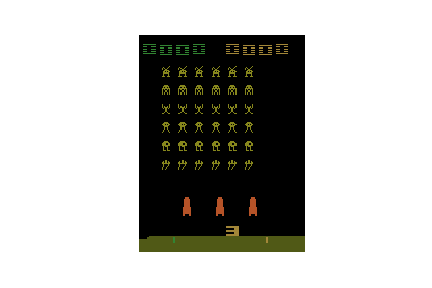
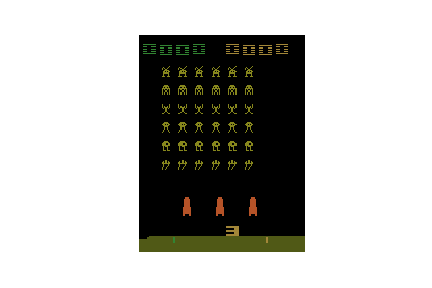
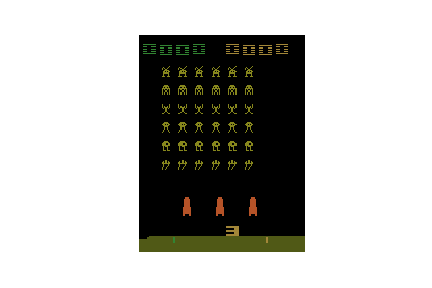
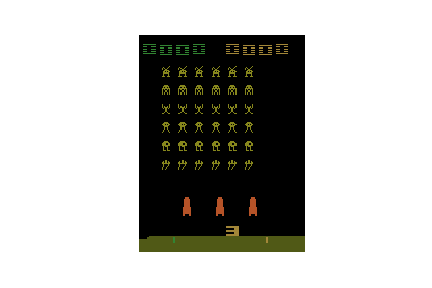
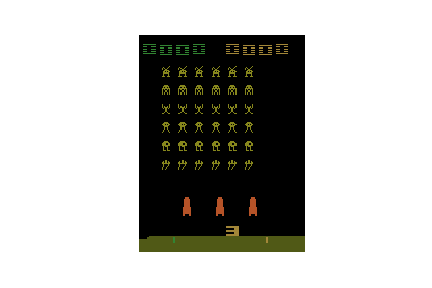
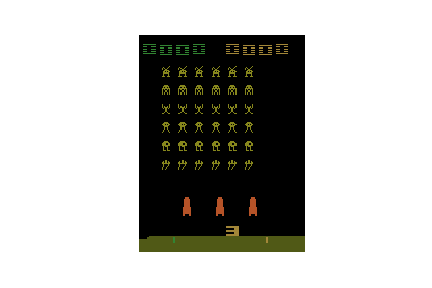
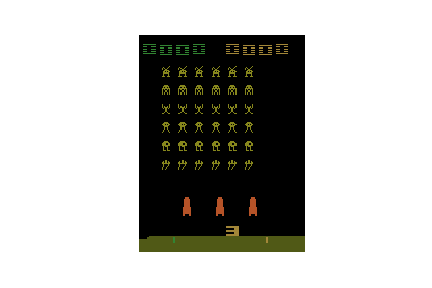
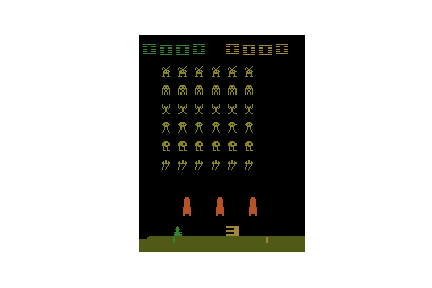
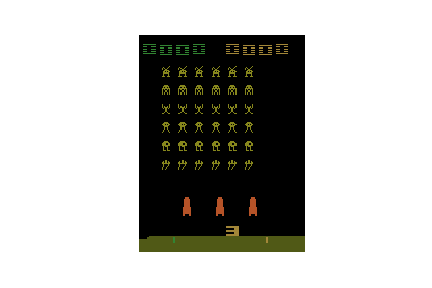
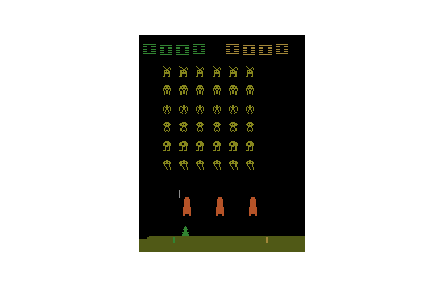
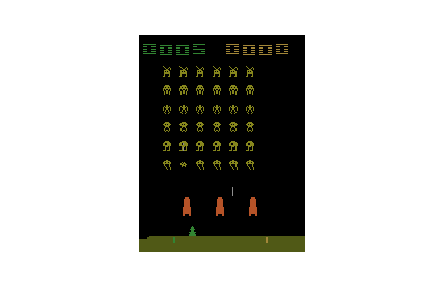
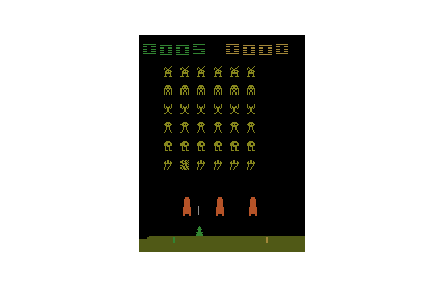
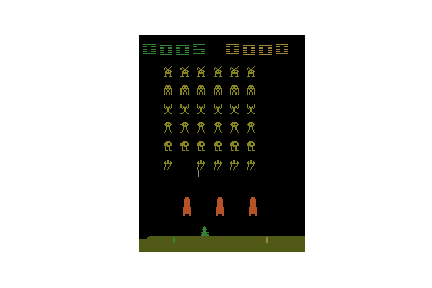
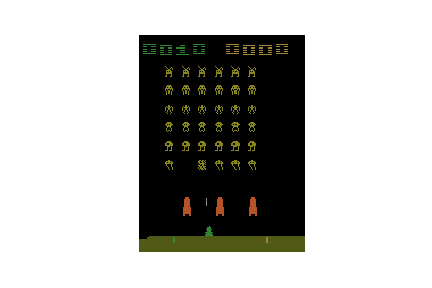
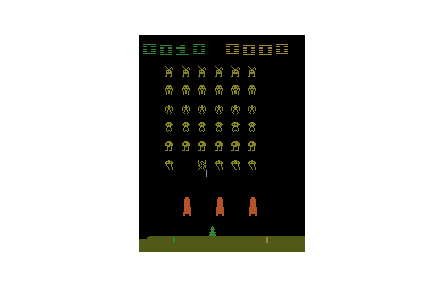
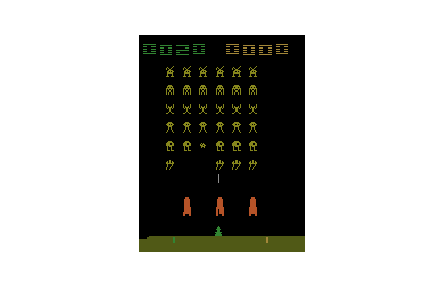
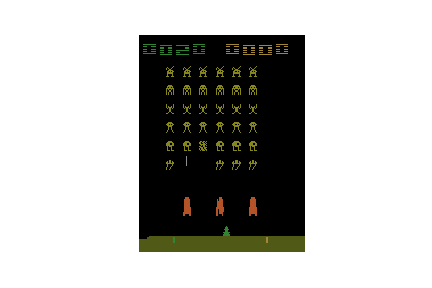
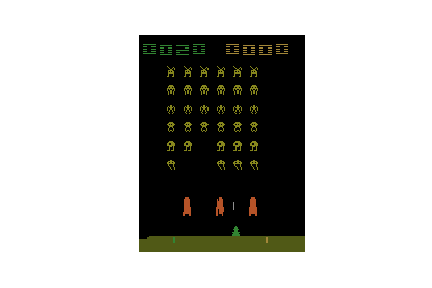
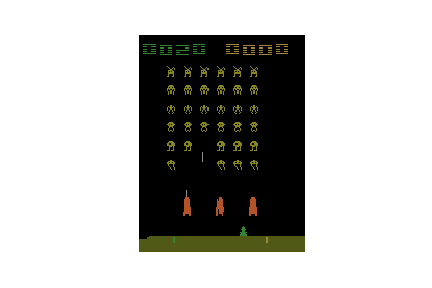
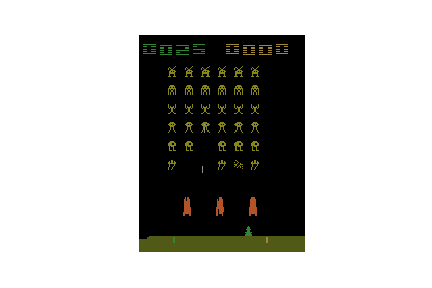
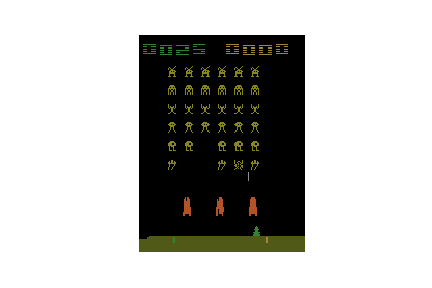
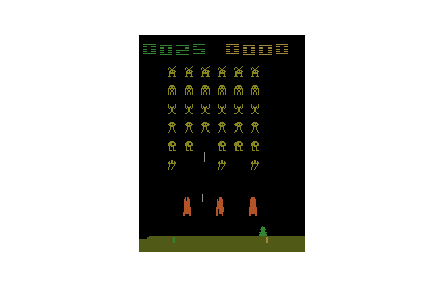
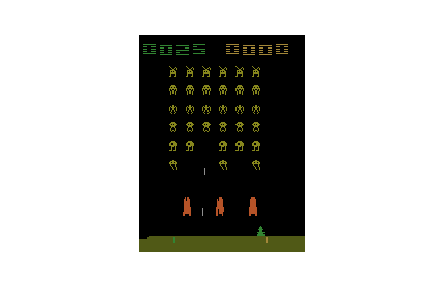
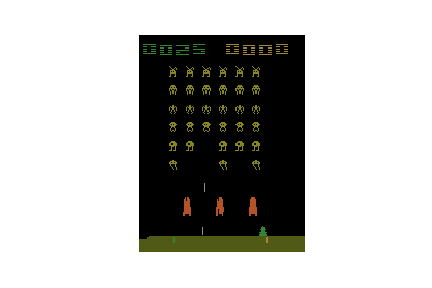
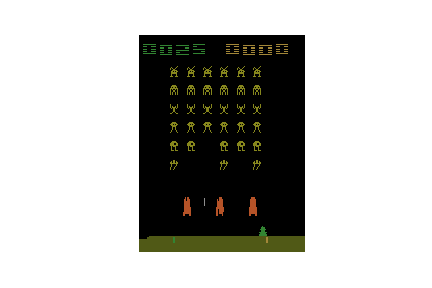
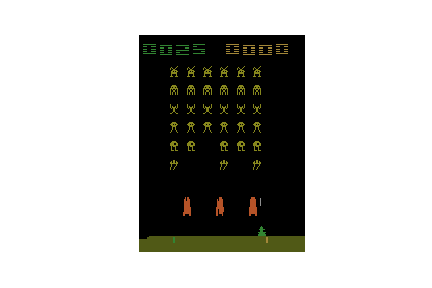
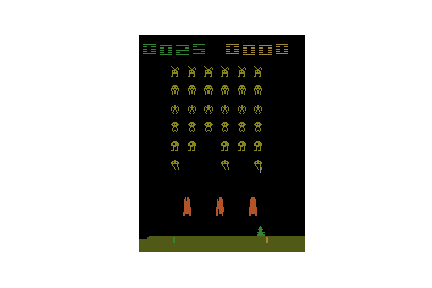
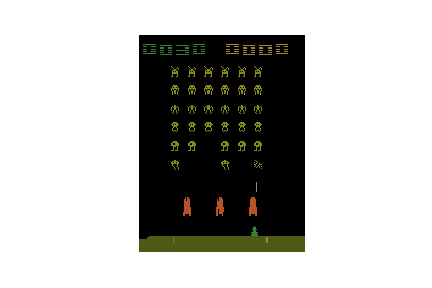
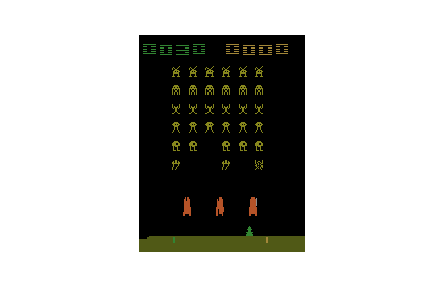
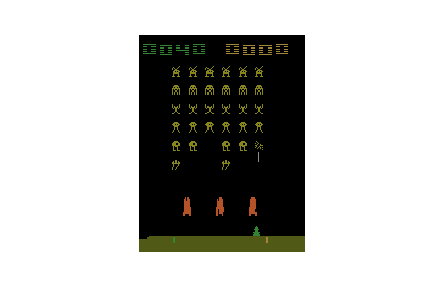
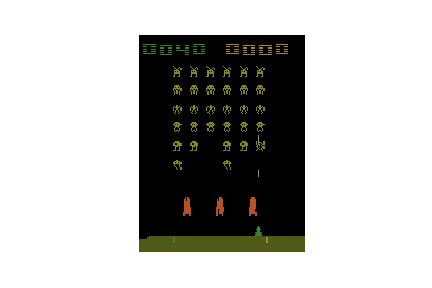
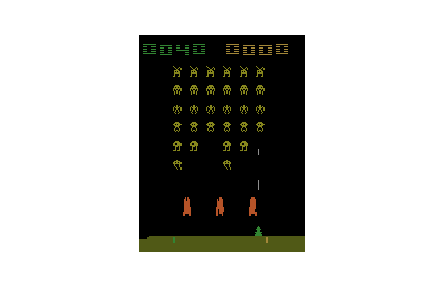
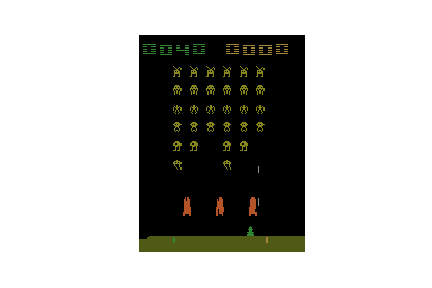
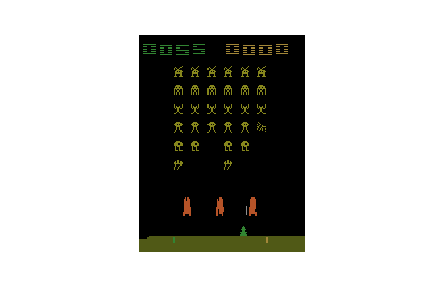
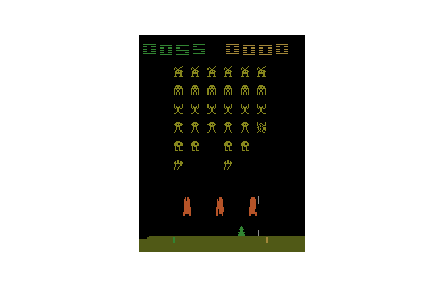
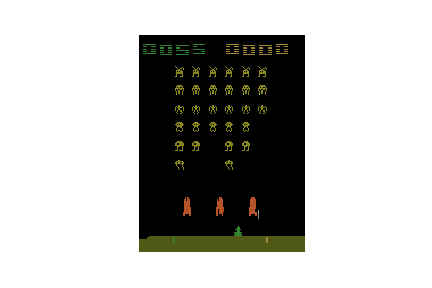
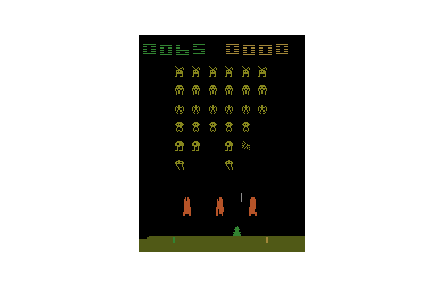
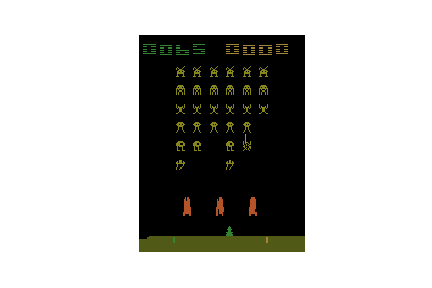
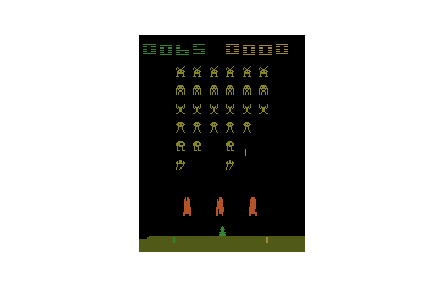
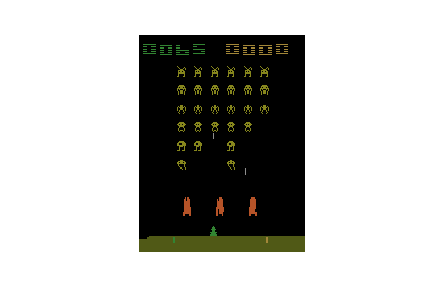
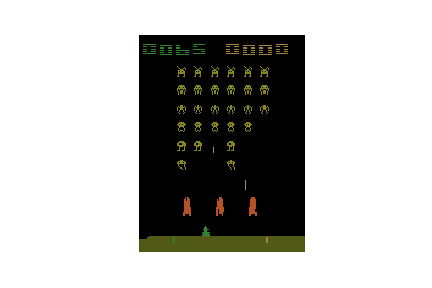
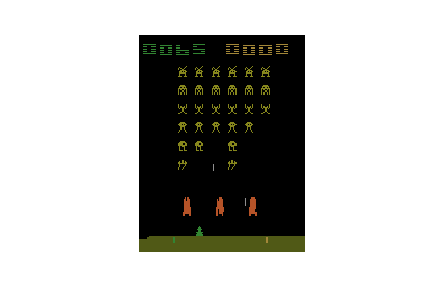
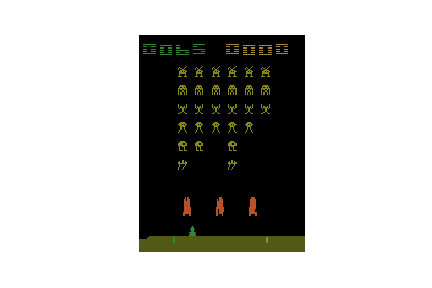
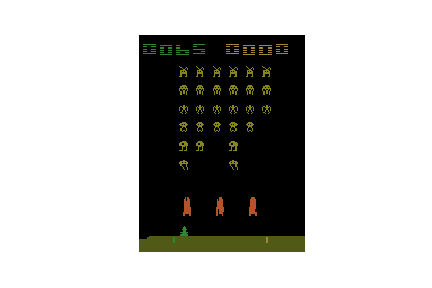
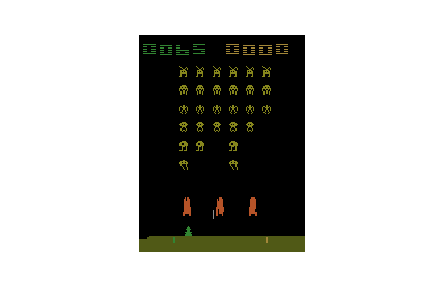
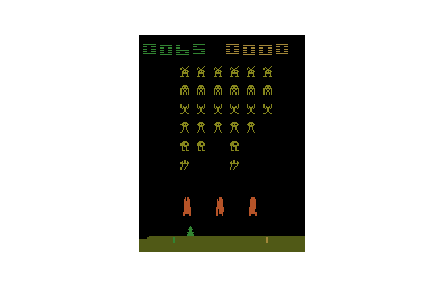
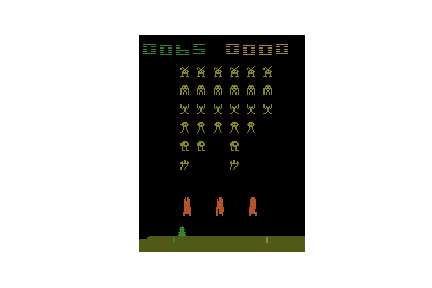
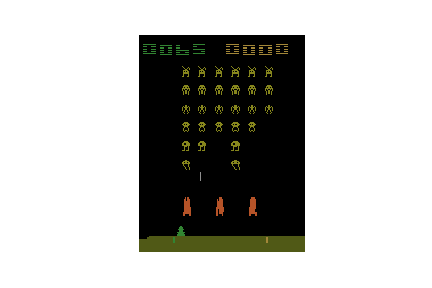
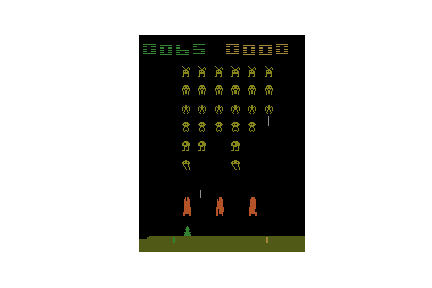
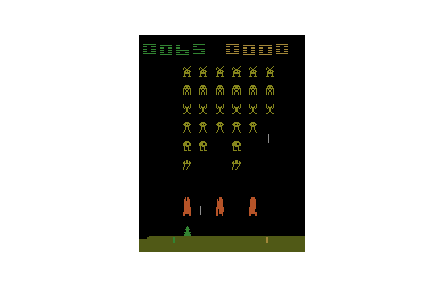
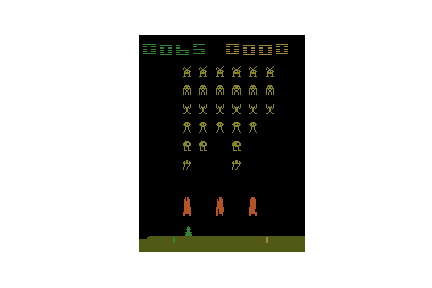
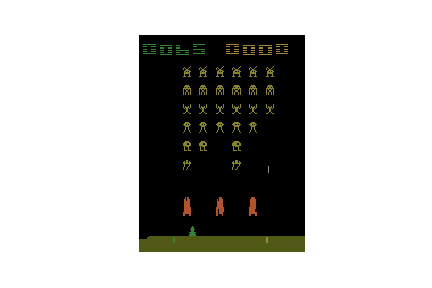
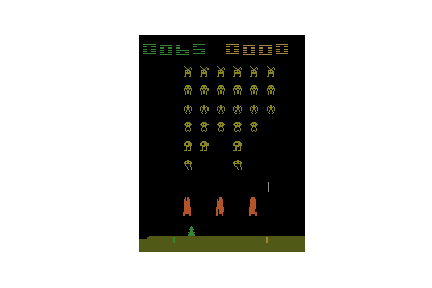
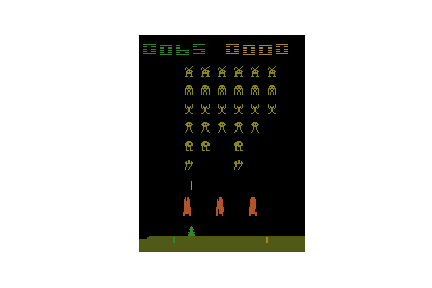
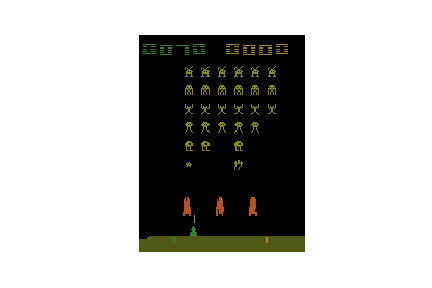
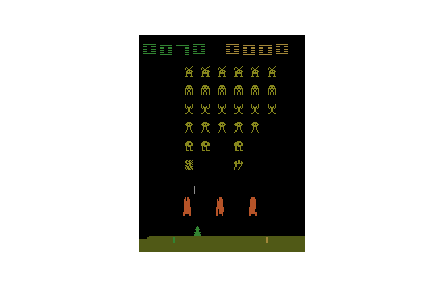
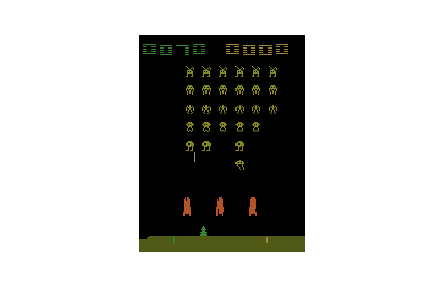
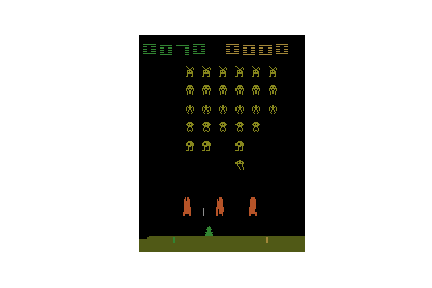
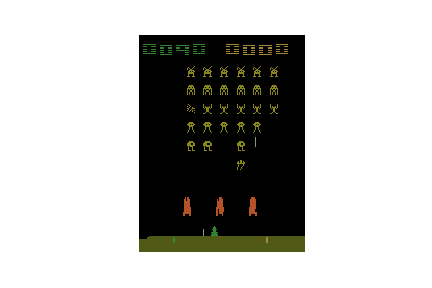
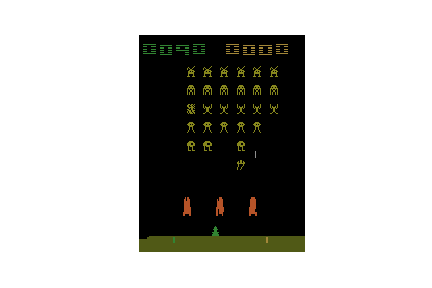
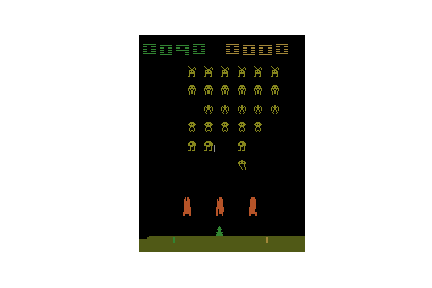
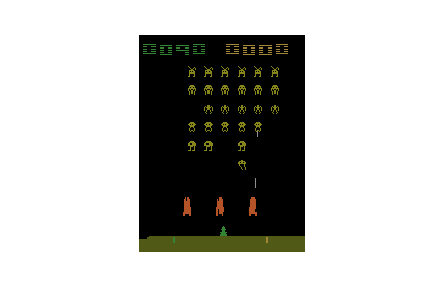
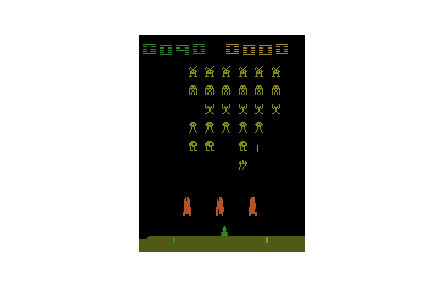
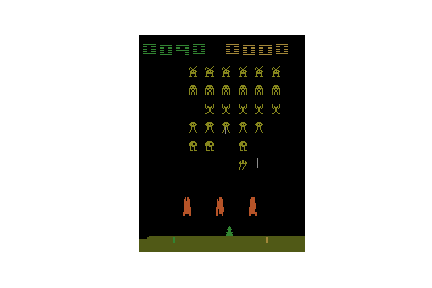
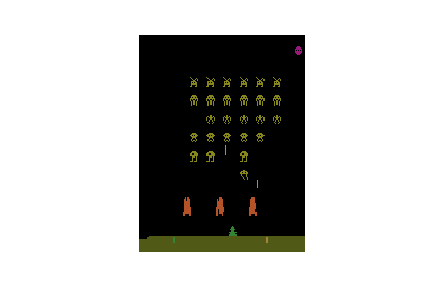
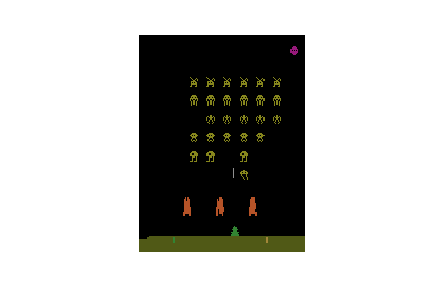
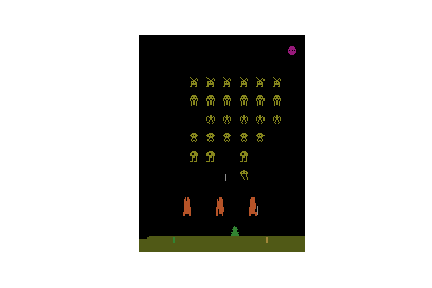
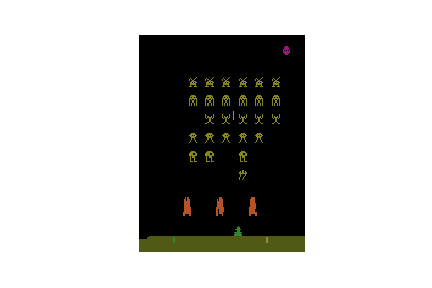
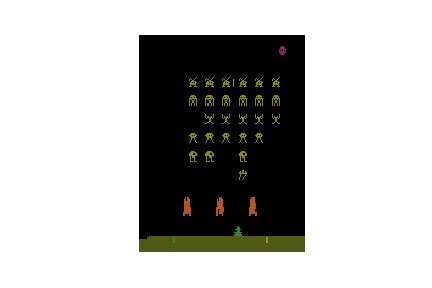
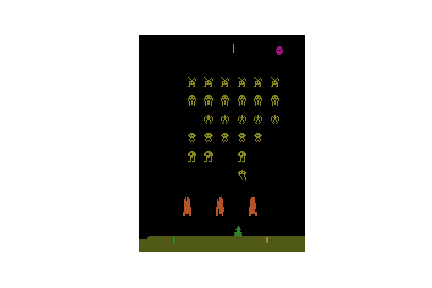
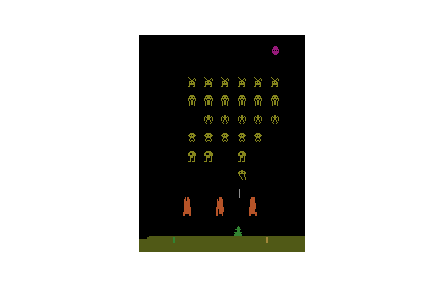
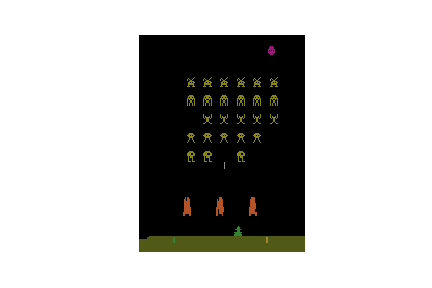
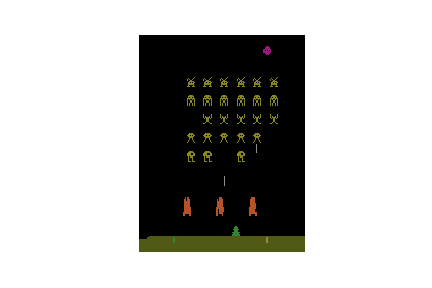
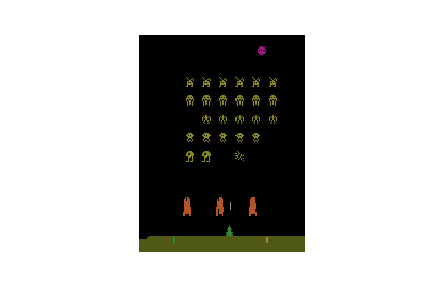
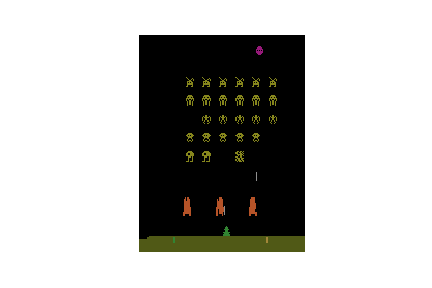
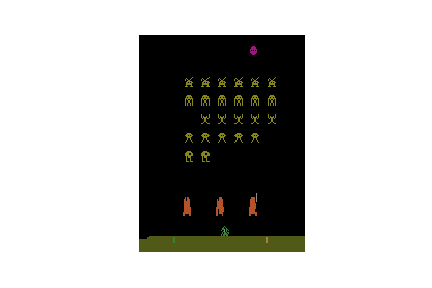
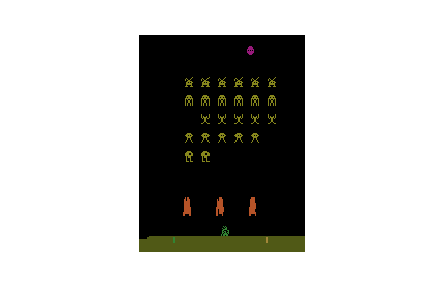
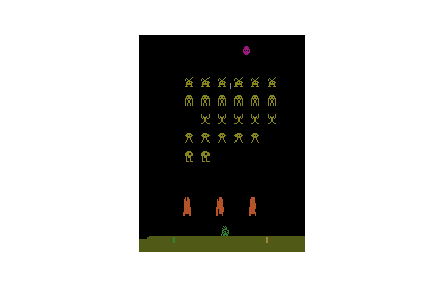
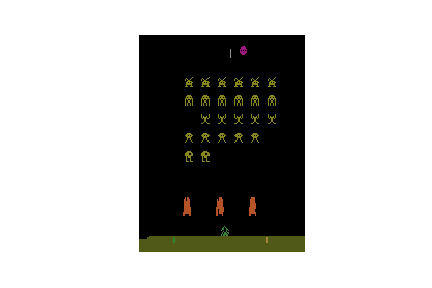
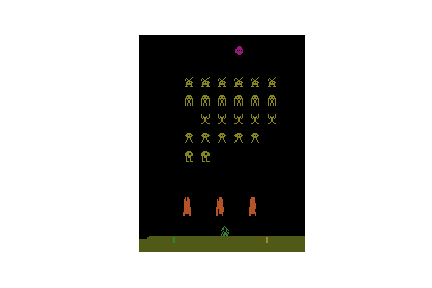
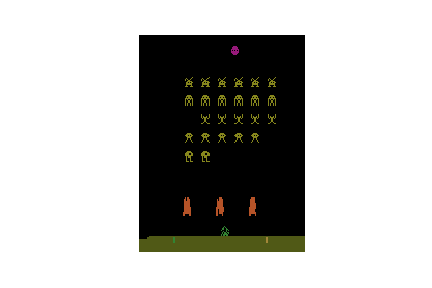
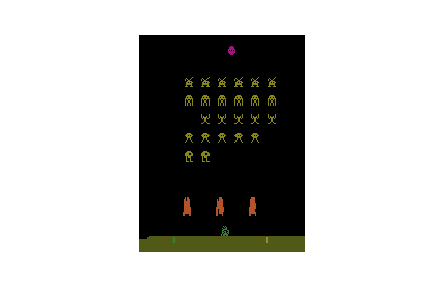
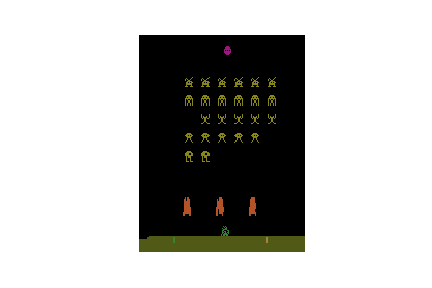
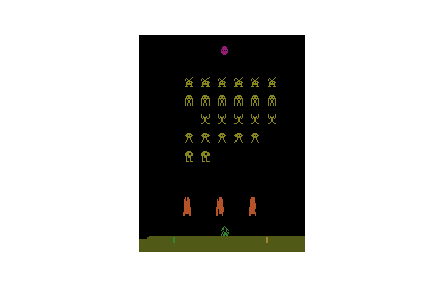
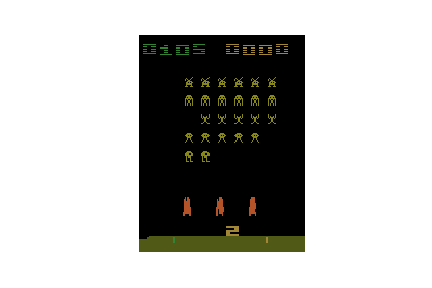
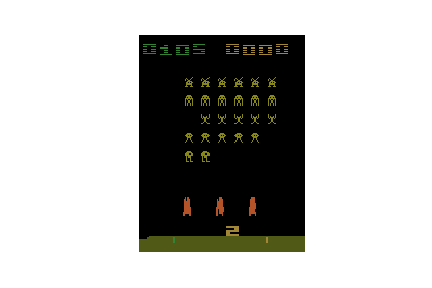
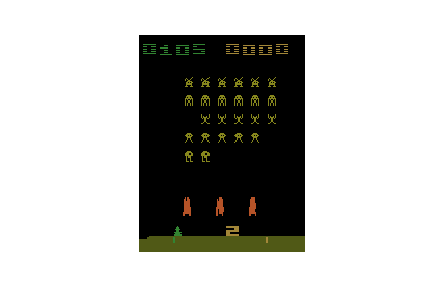
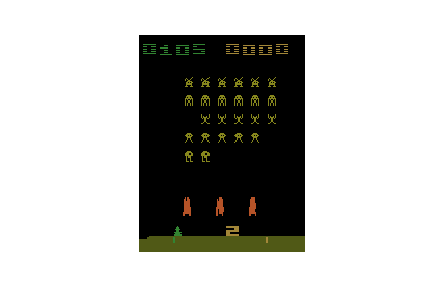
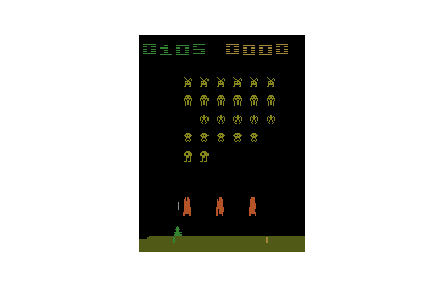
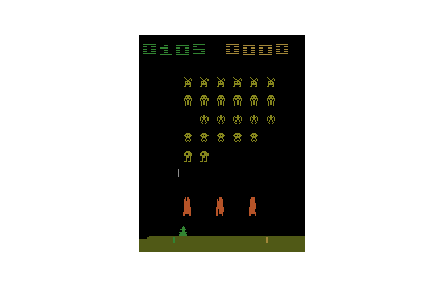
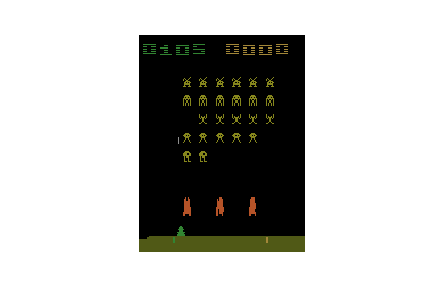
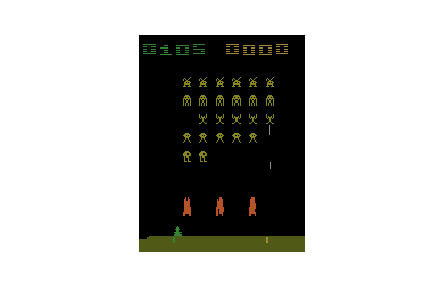
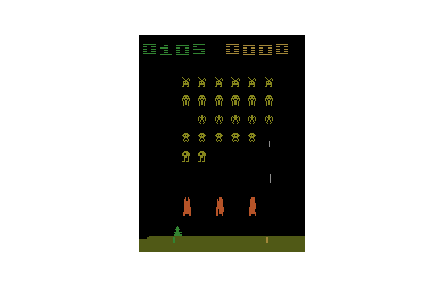
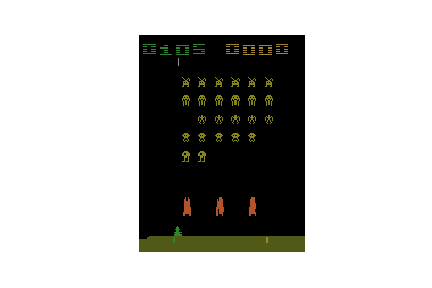
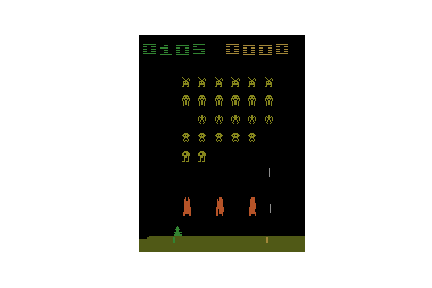
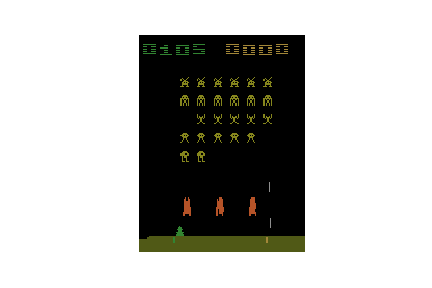
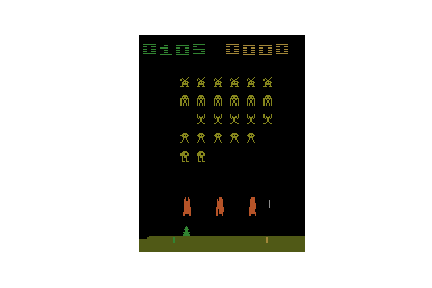
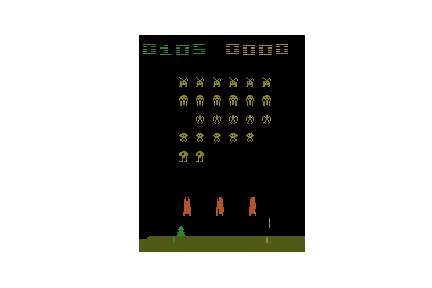
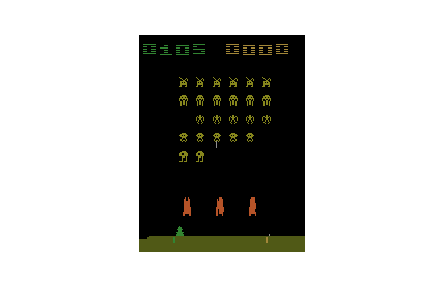
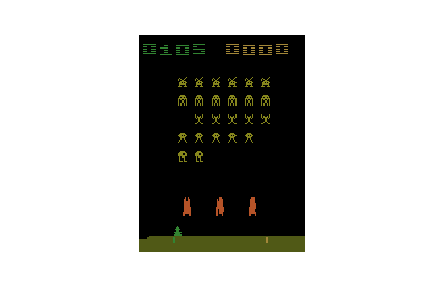
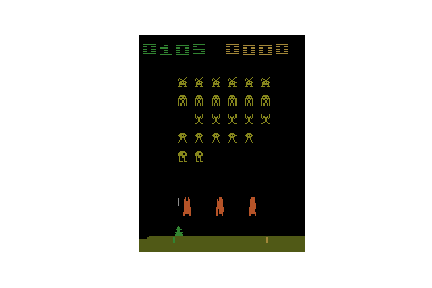
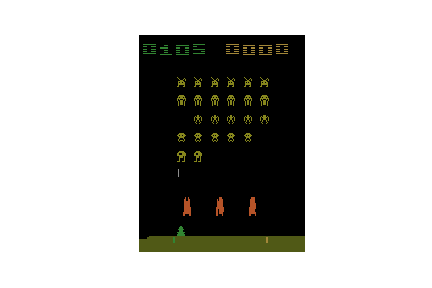
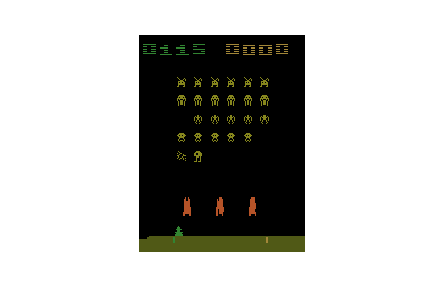
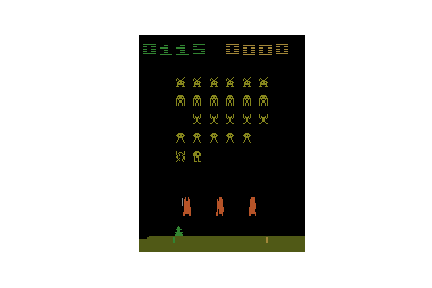
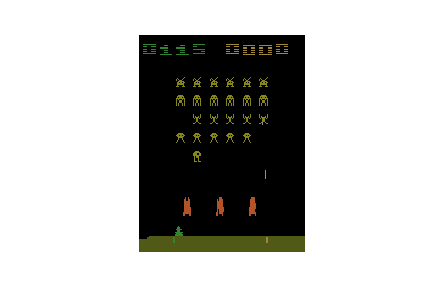
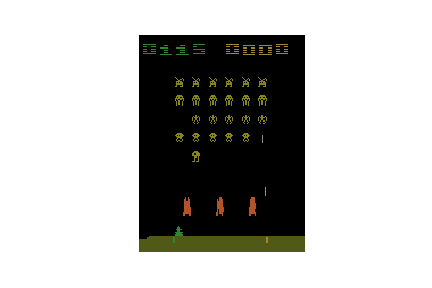
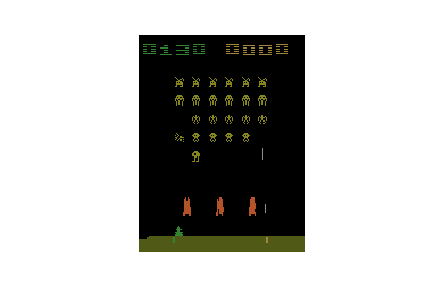
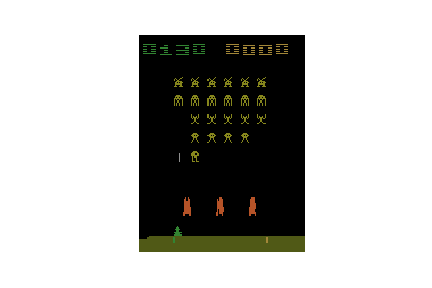
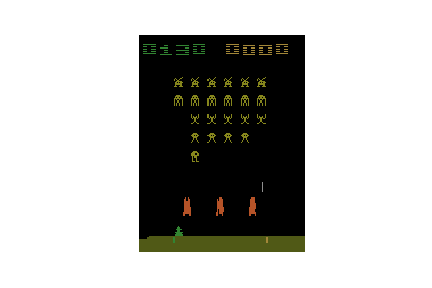
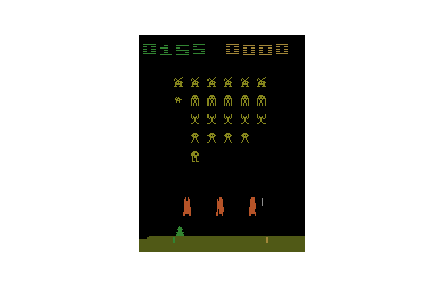
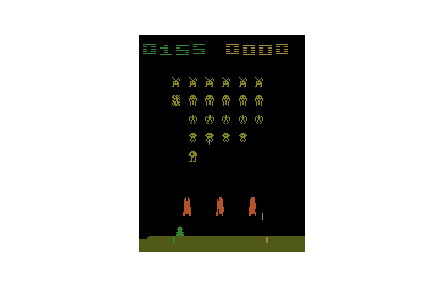
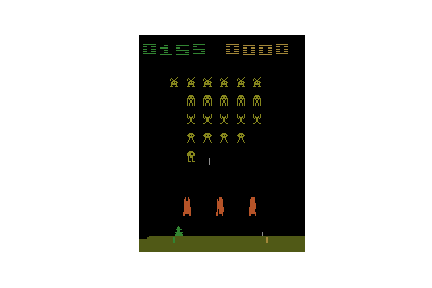
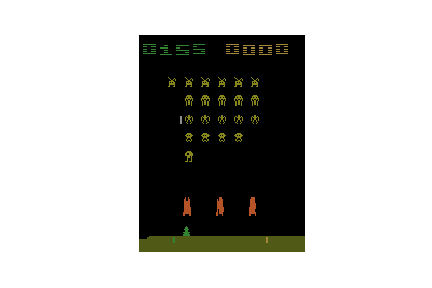
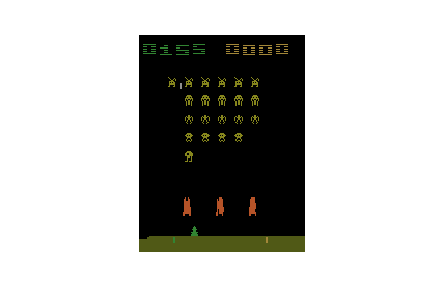
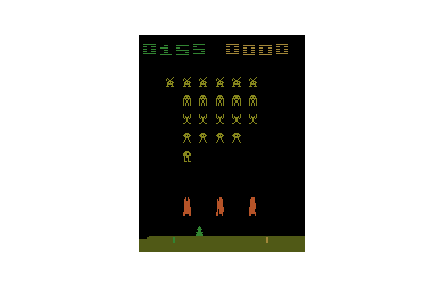
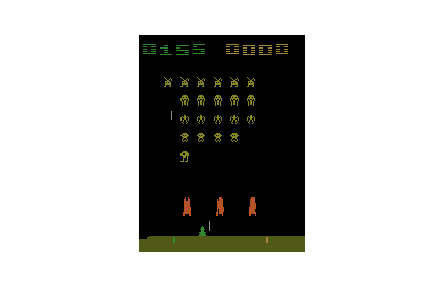
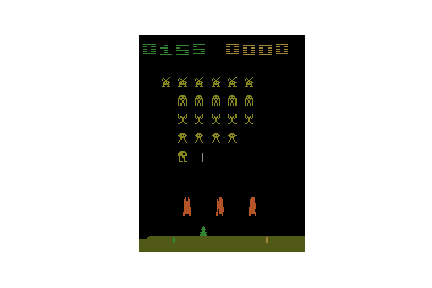
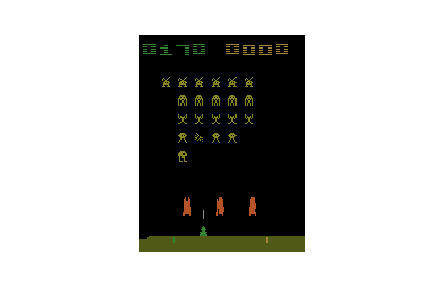
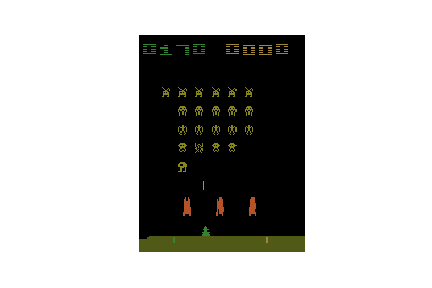
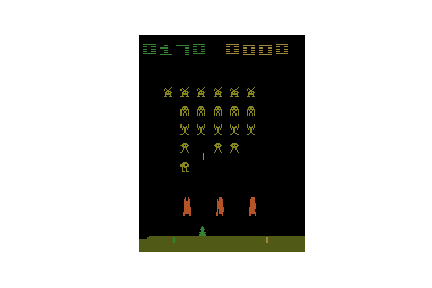
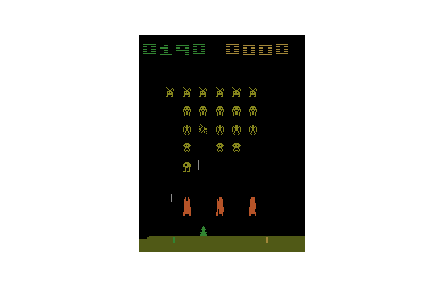
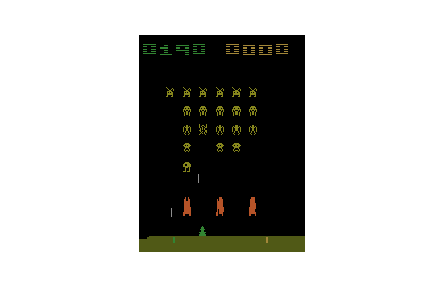
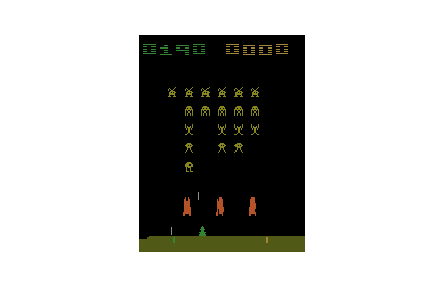
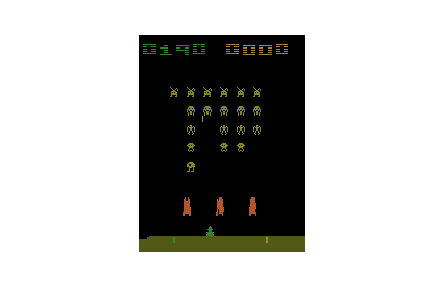
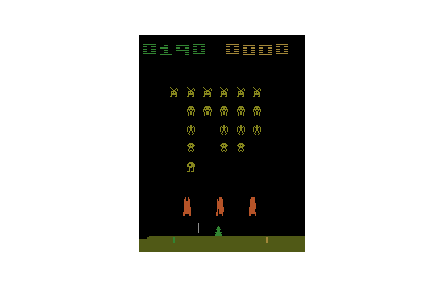
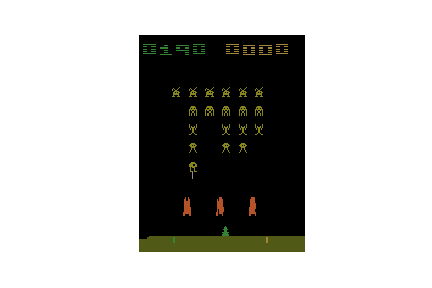
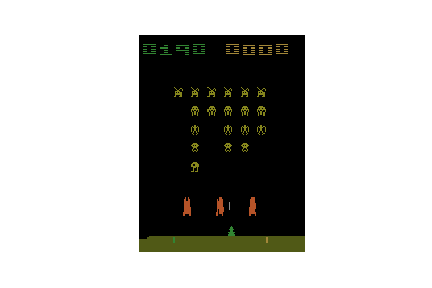
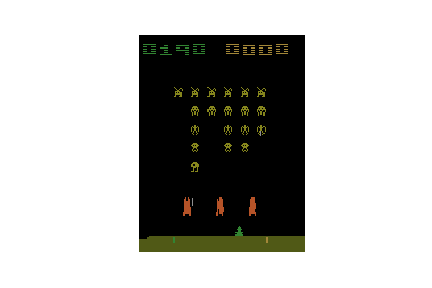
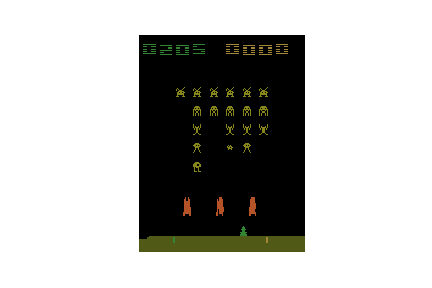
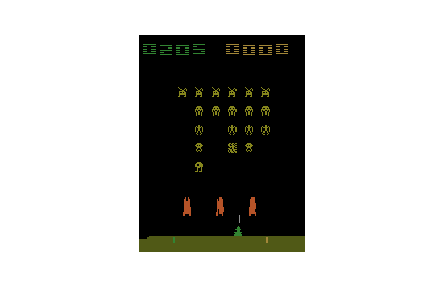
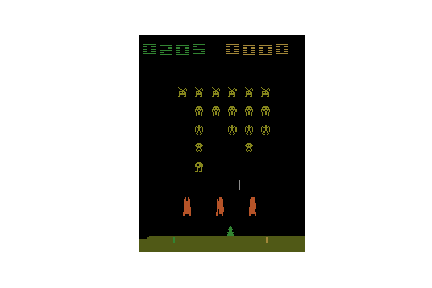
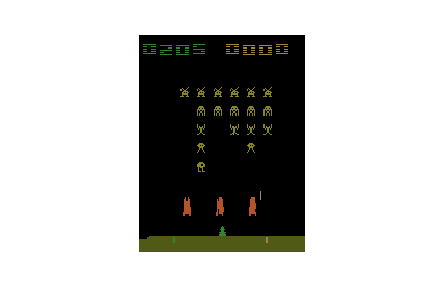
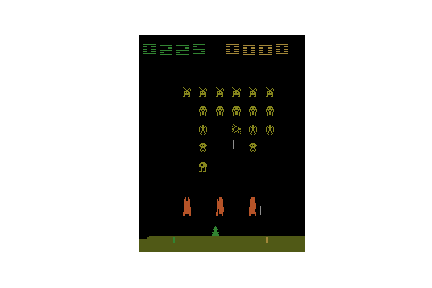
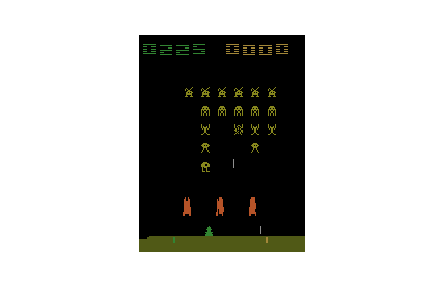
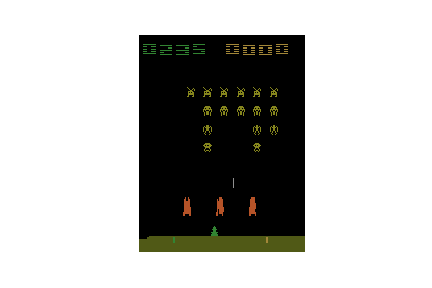
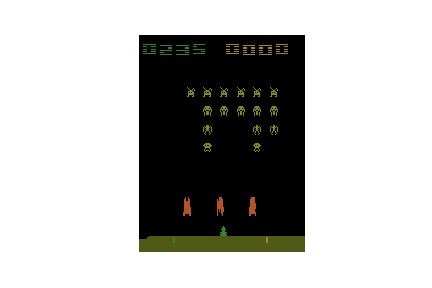
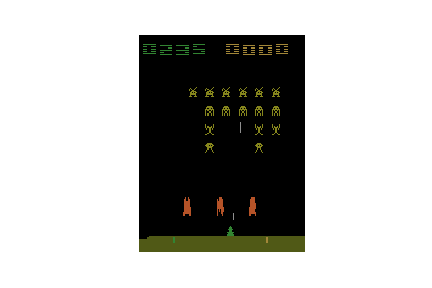
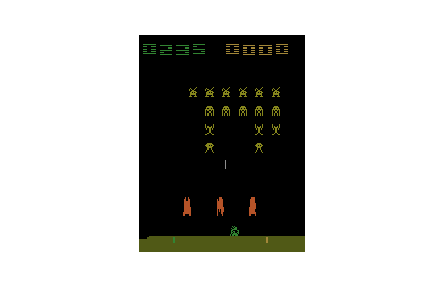
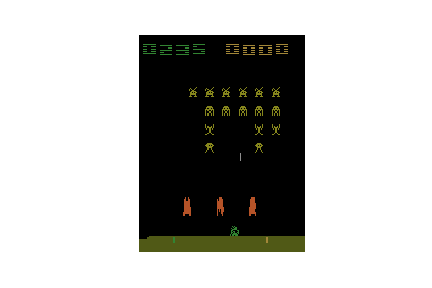
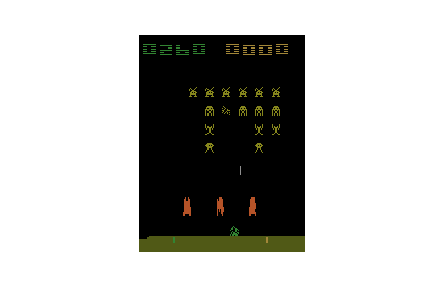
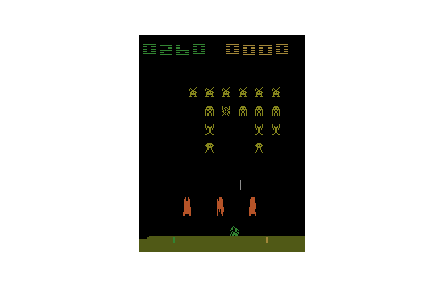
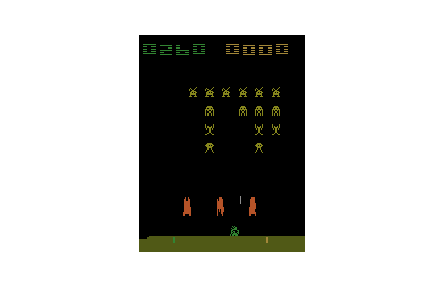
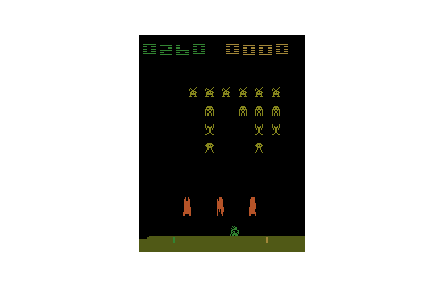
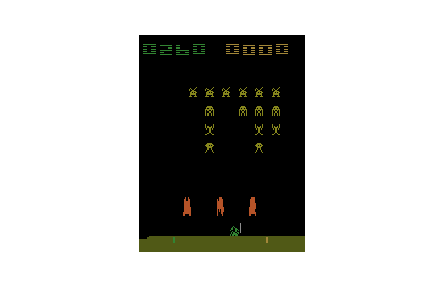
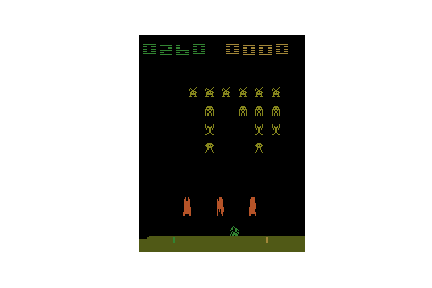
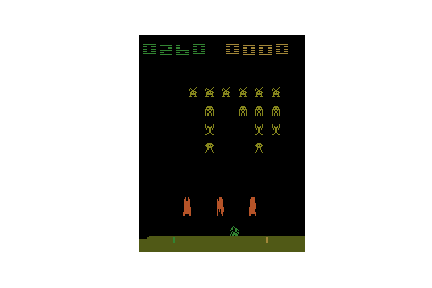
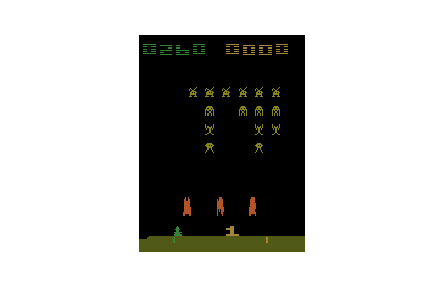
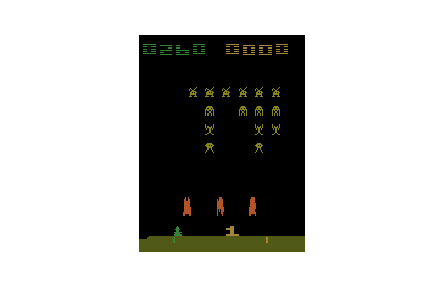
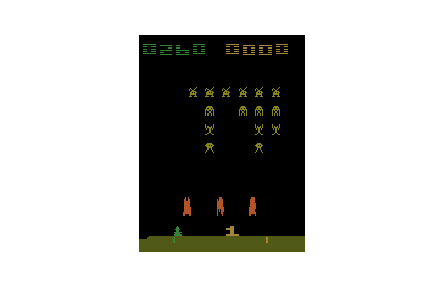
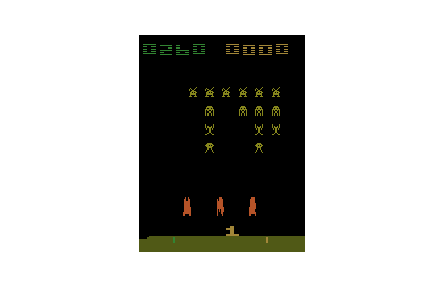
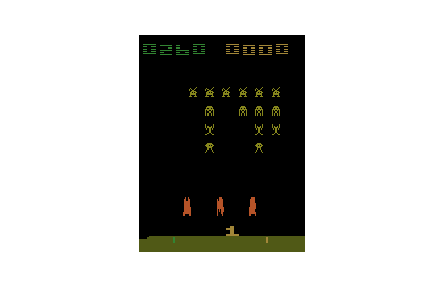
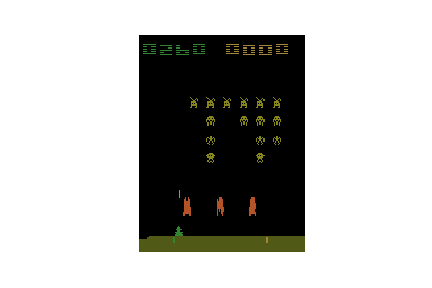
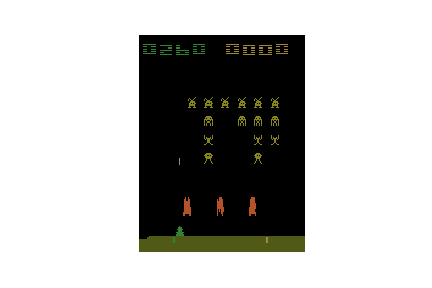
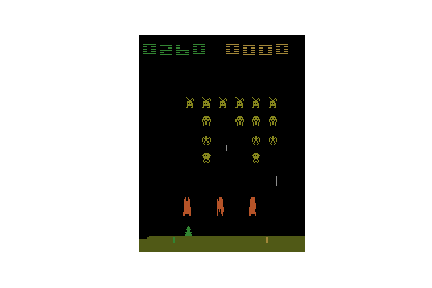
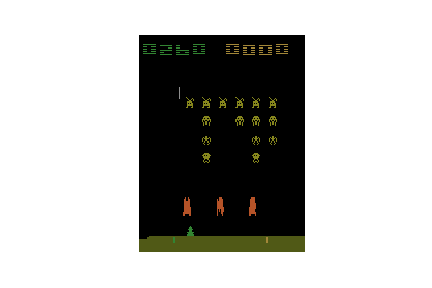
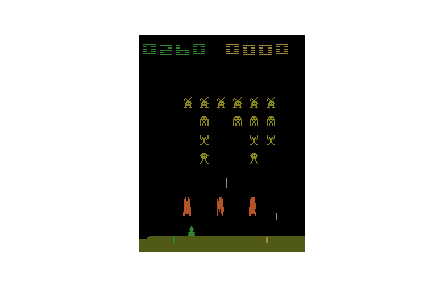
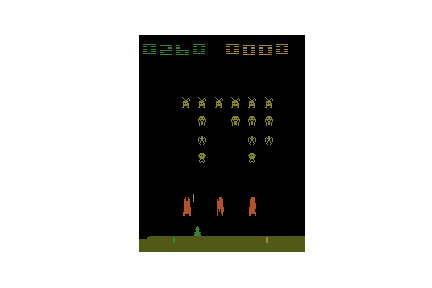
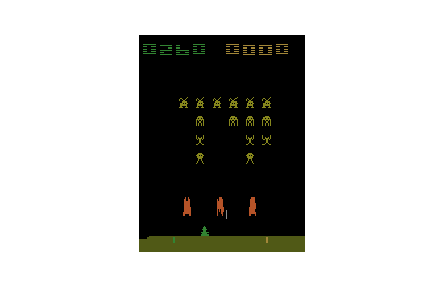
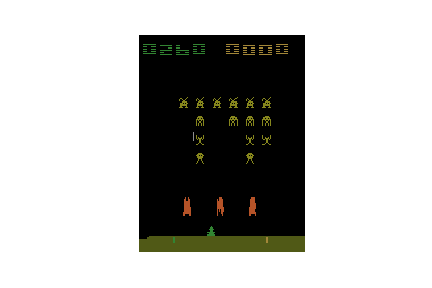
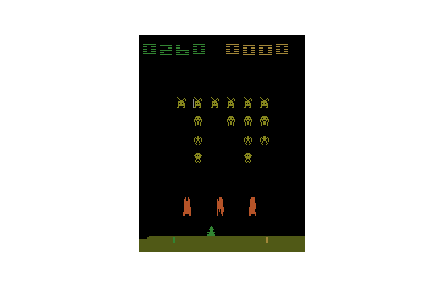
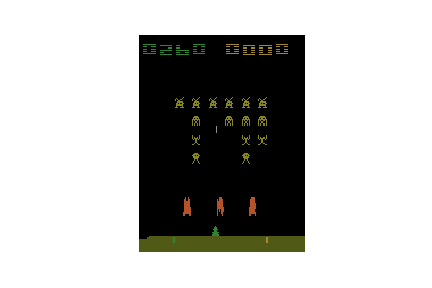
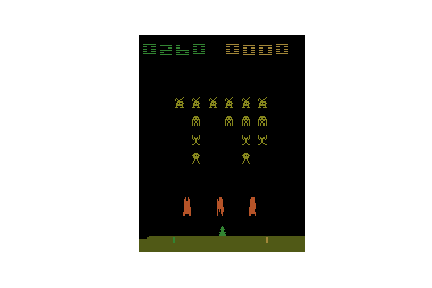
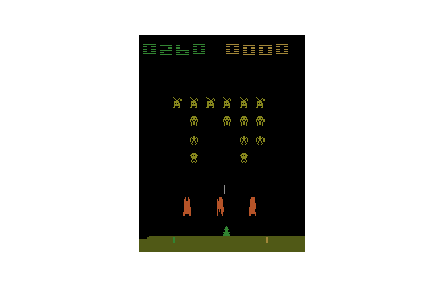
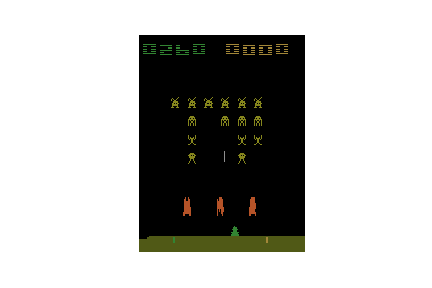
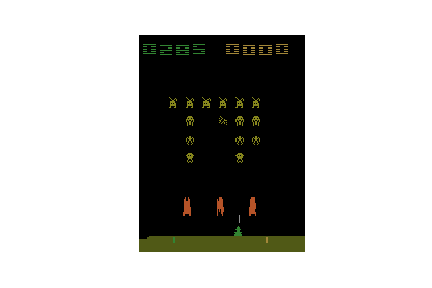
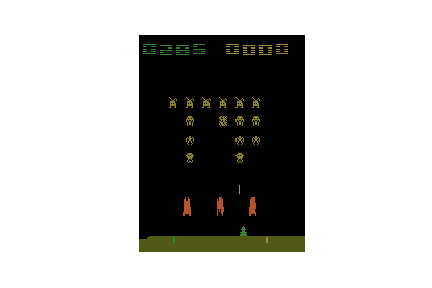
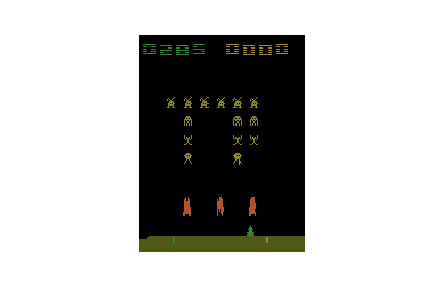
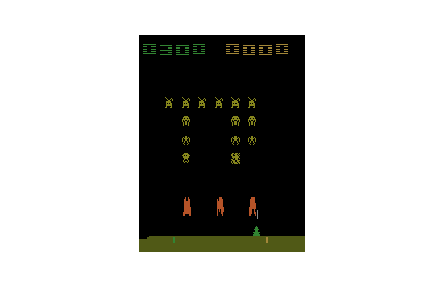
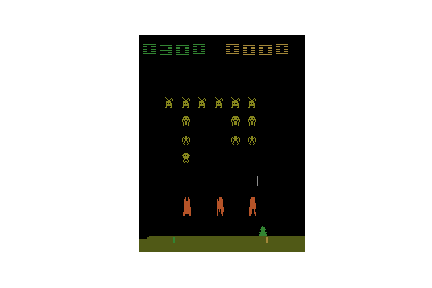
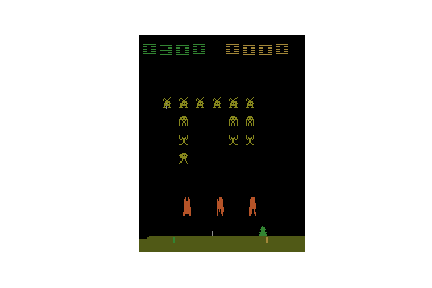
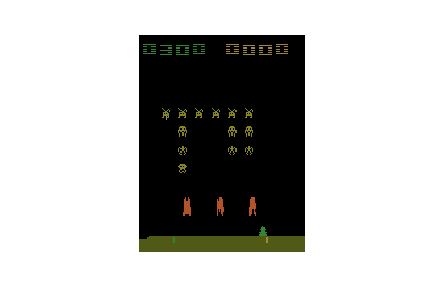
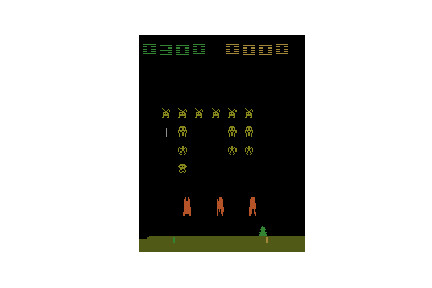
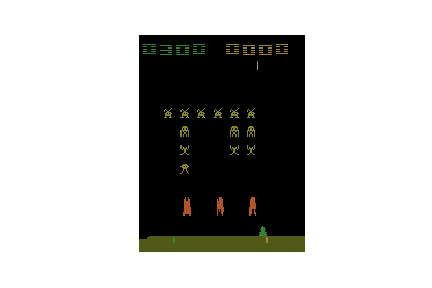
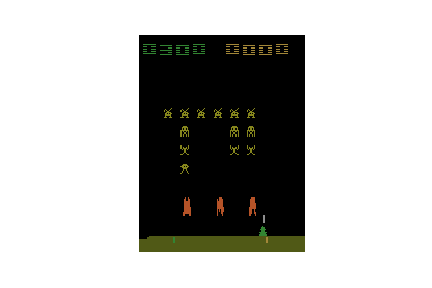
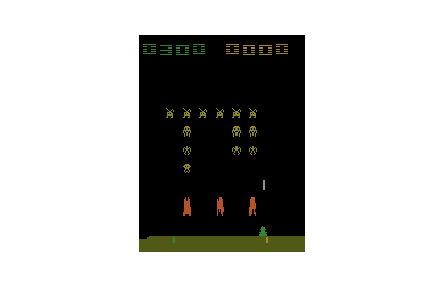
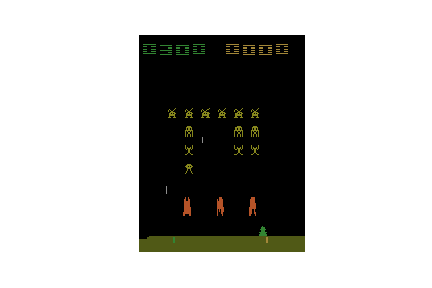
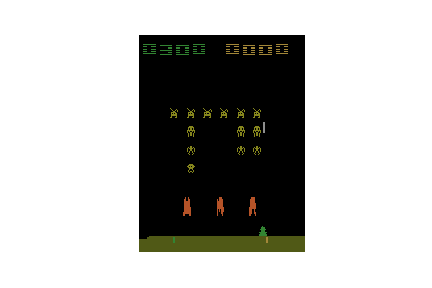
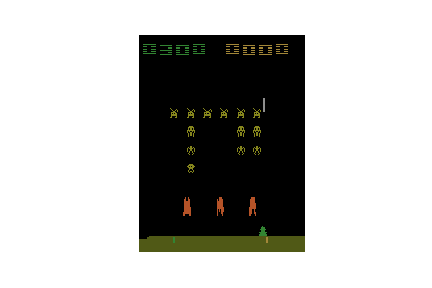
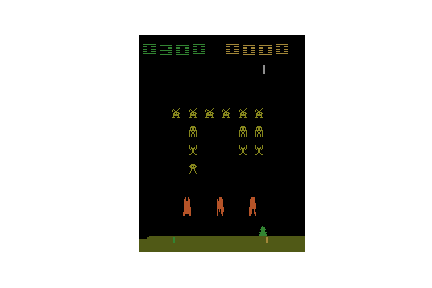
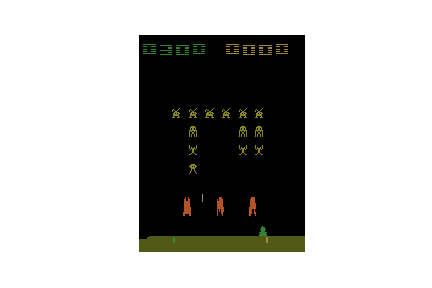
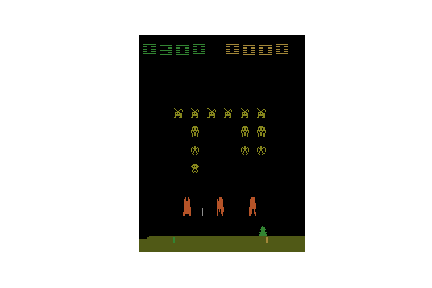
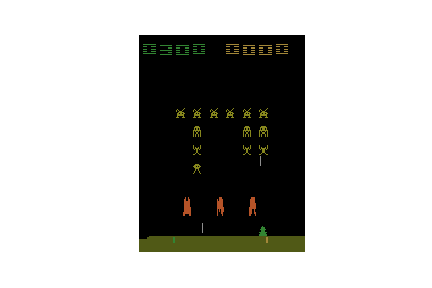
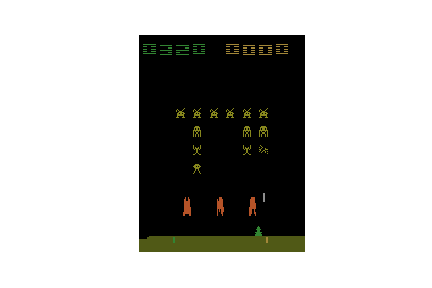
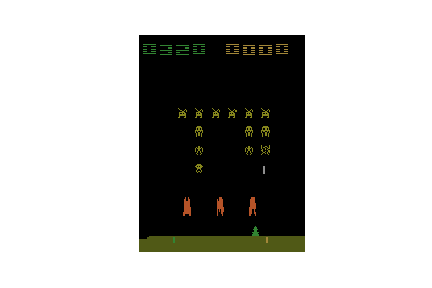
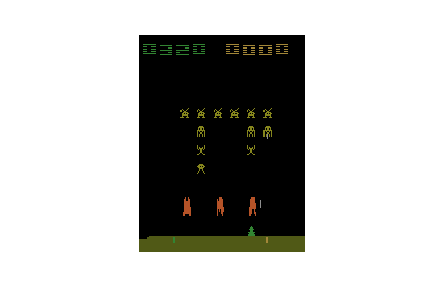
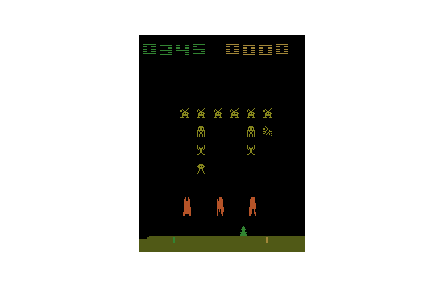
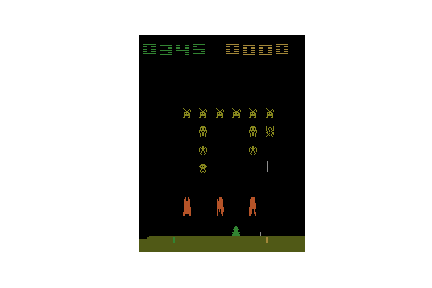
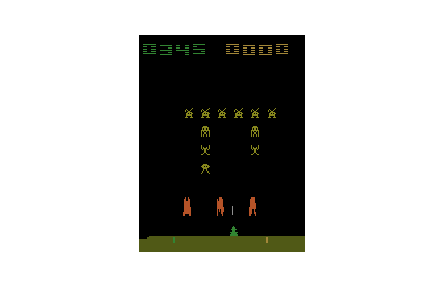
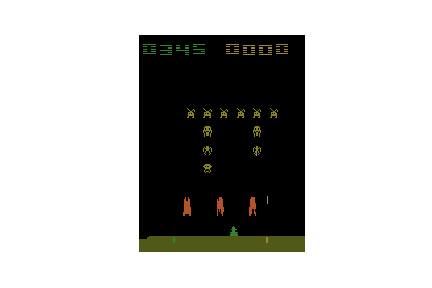
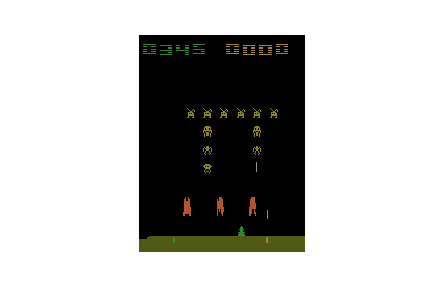
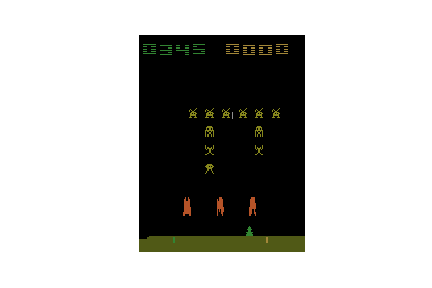
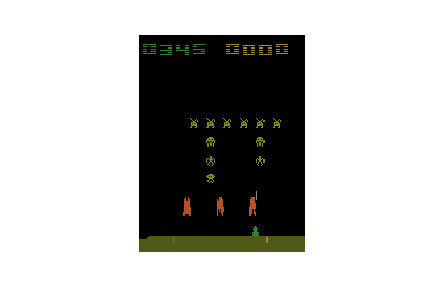
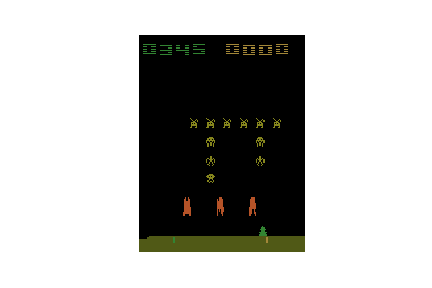
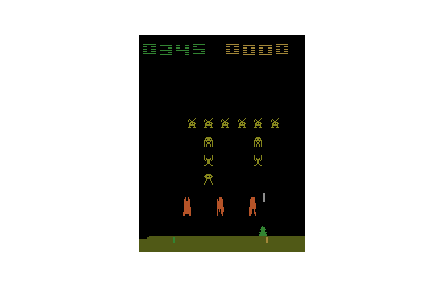
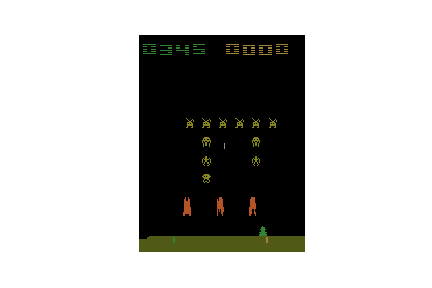
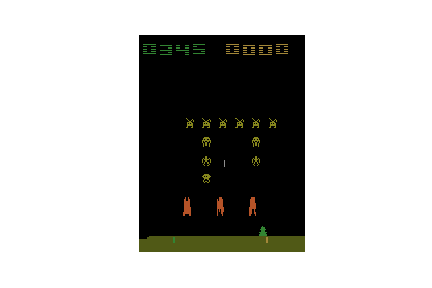
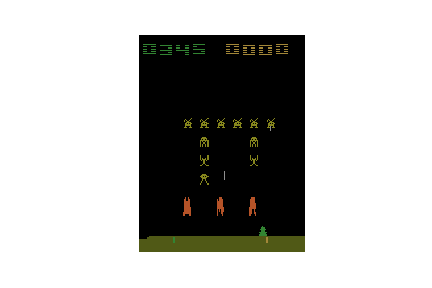
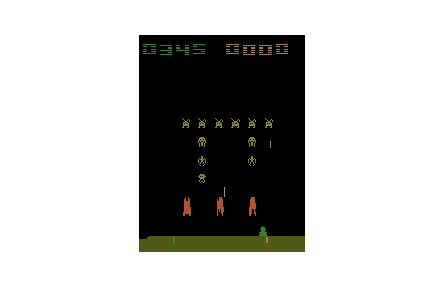
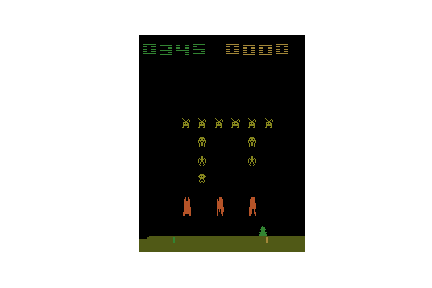
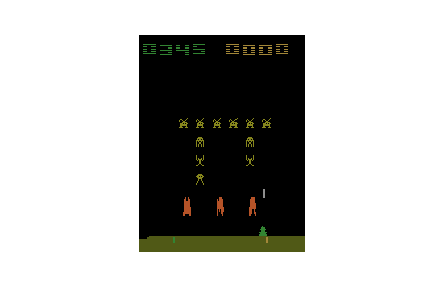
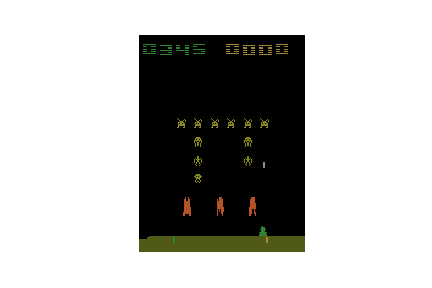
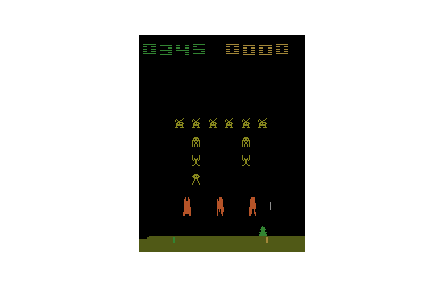
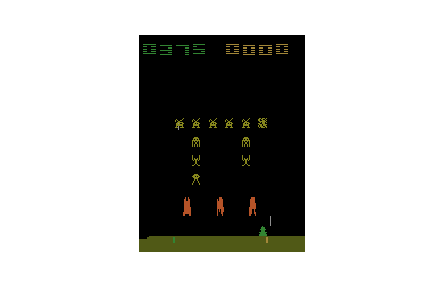
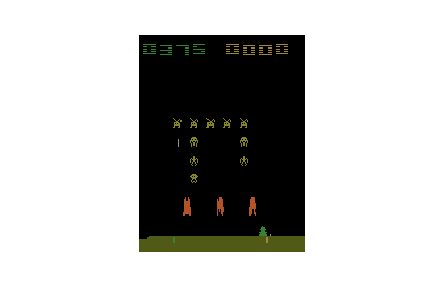
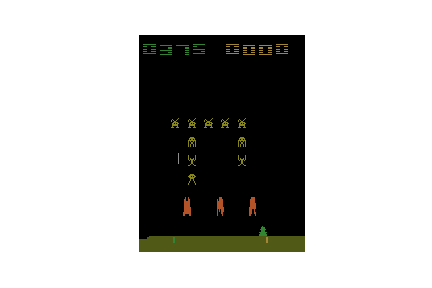

In [113]:
display_frames_as_gif(frames[::5])

In [108]:
env = gym.make('SpaceInvaders-v0')
observation = env.reset()
frames = []
for i in range(1024):
    frames.append(env.render(mode = 'rgb_array'))
    action = random.choice([0,1,2,3,4,5])
    observation, reward, done, info = env.step(action)
    
    


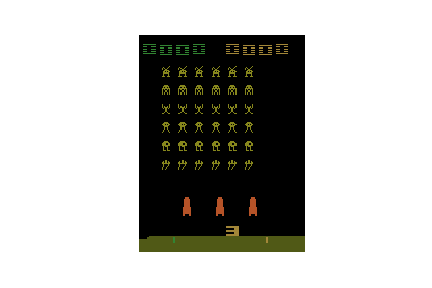
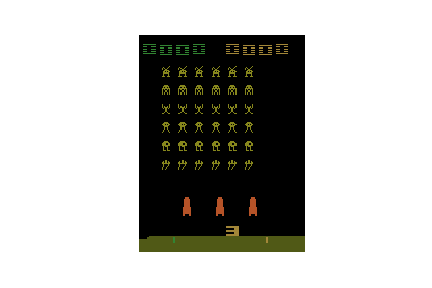
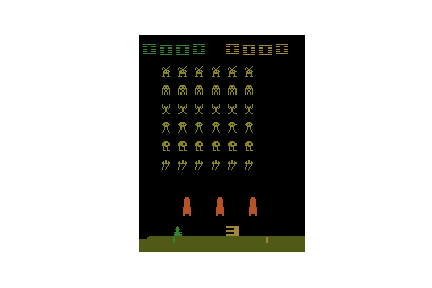
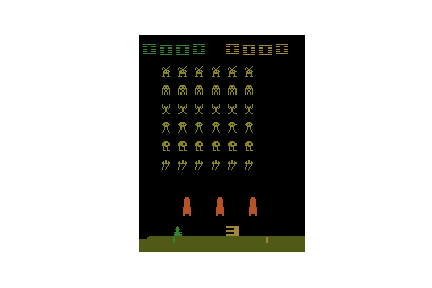
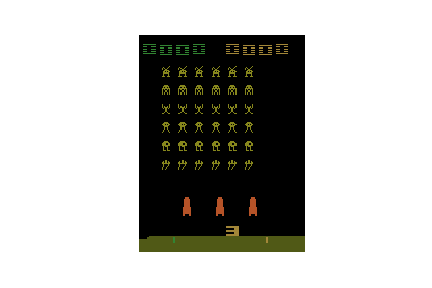
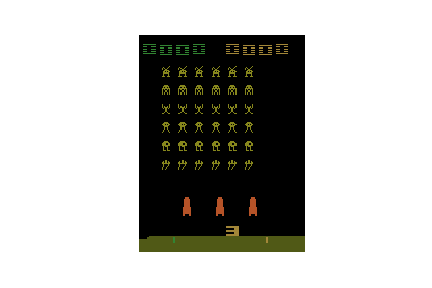
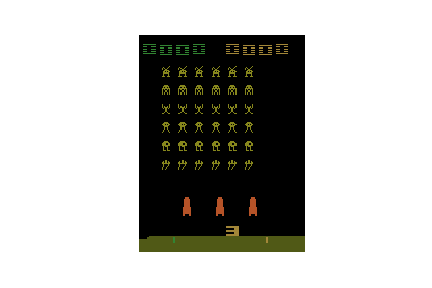
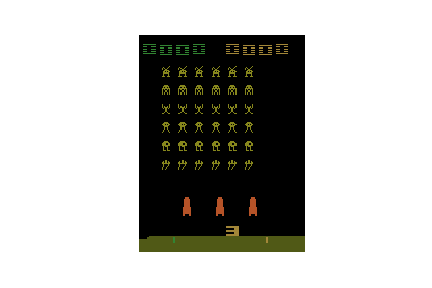
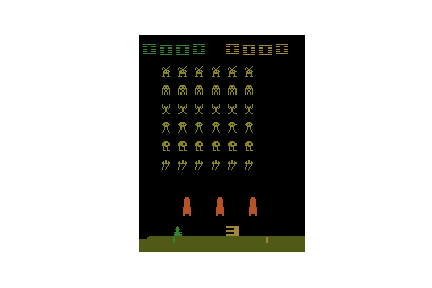
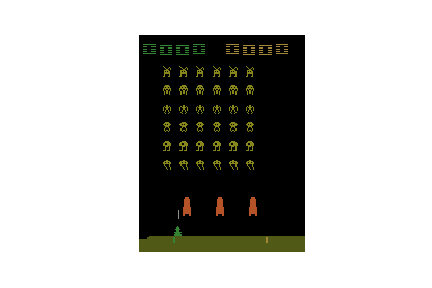
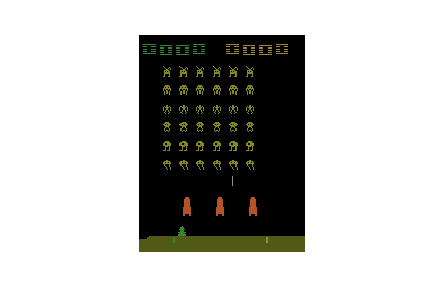
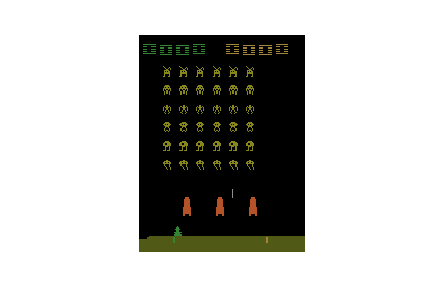
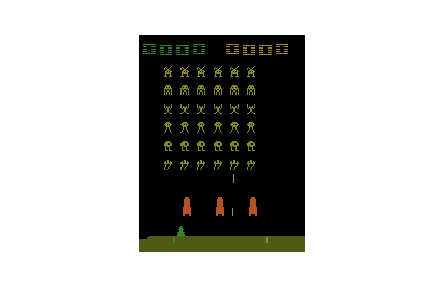
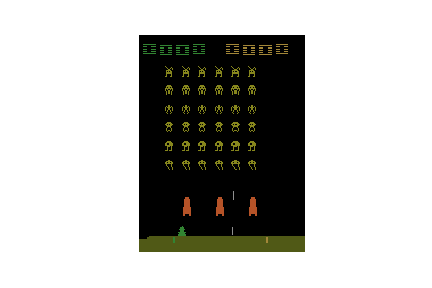
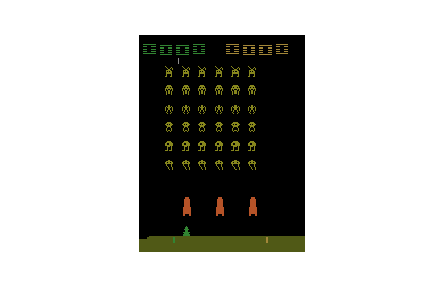
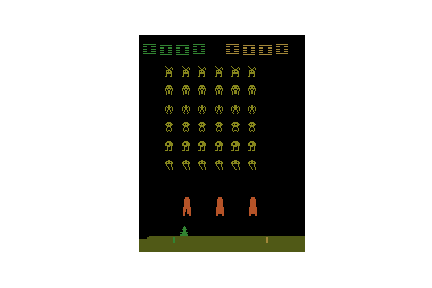
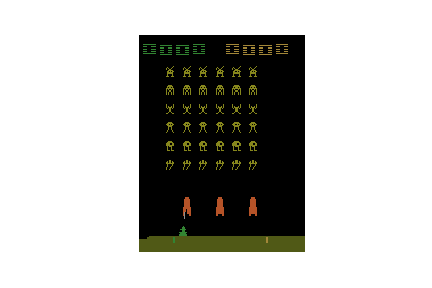
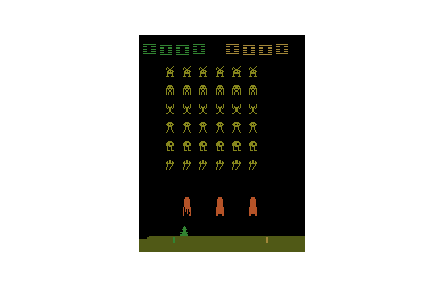
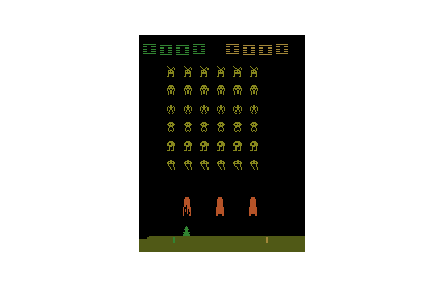
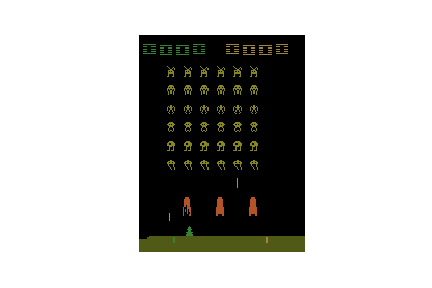
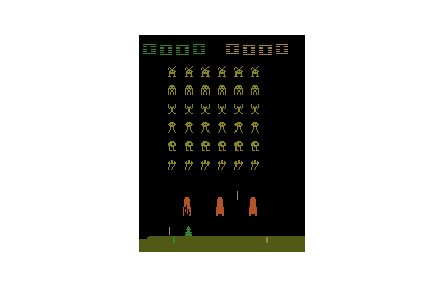
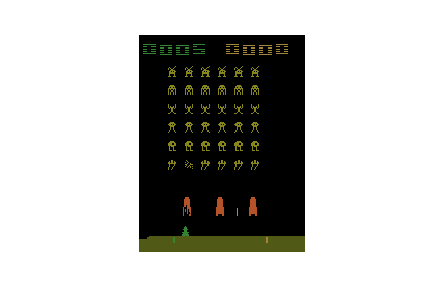
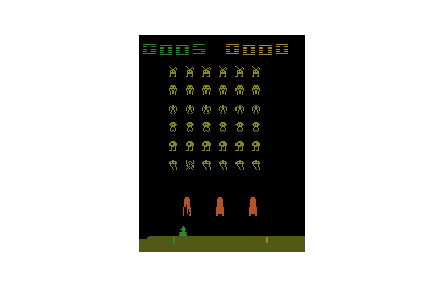
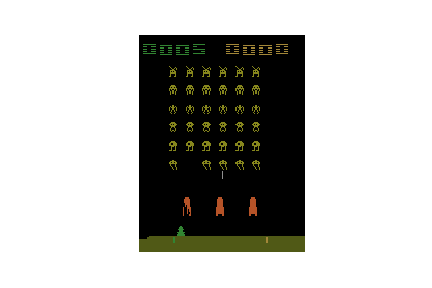
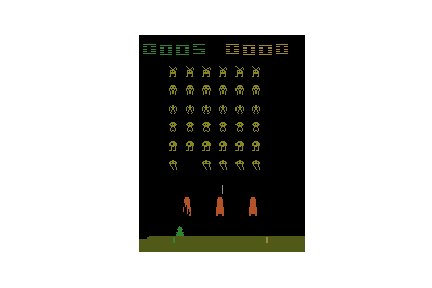
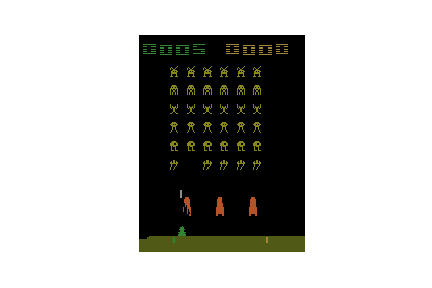
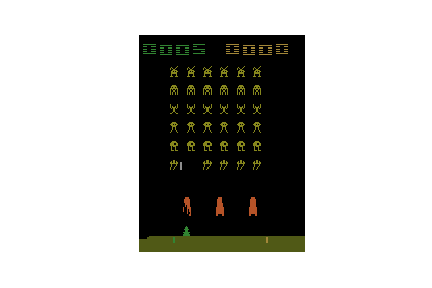
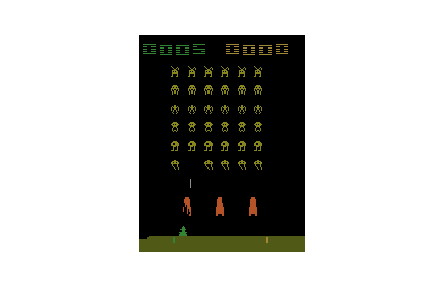
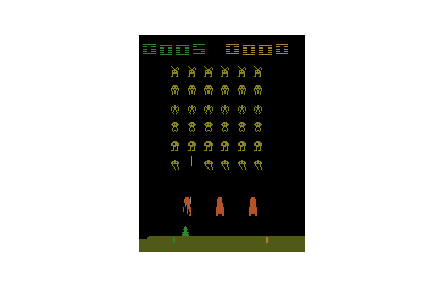
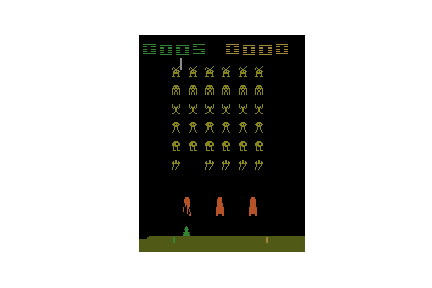
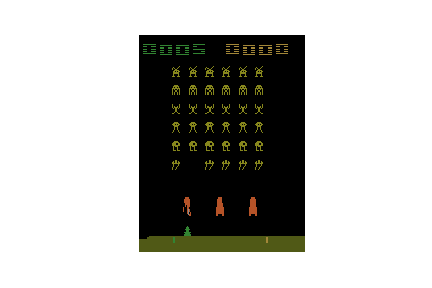
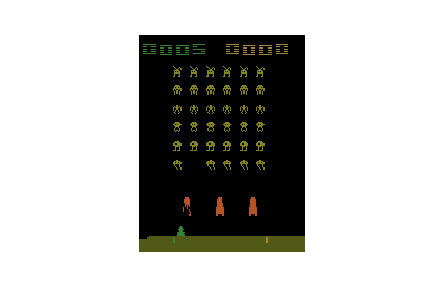
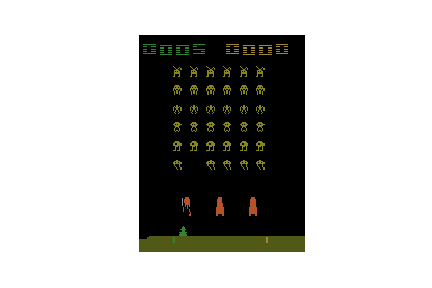
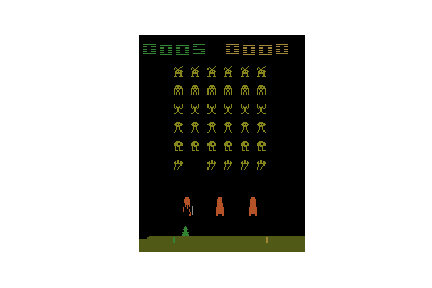
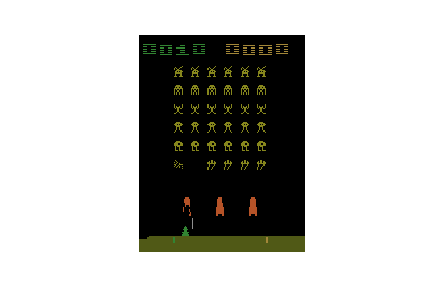
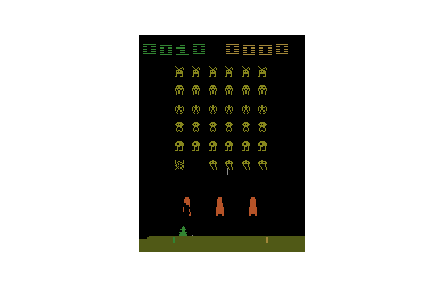
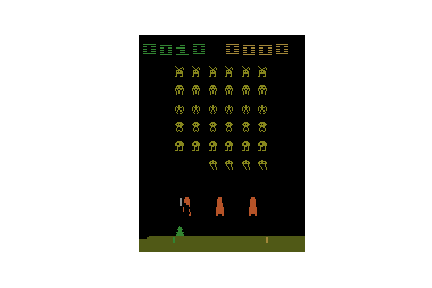
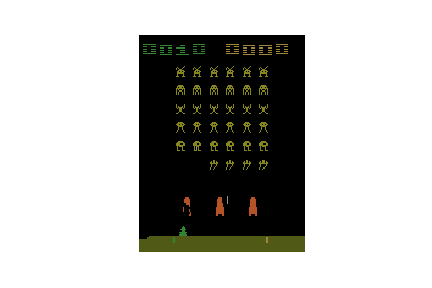
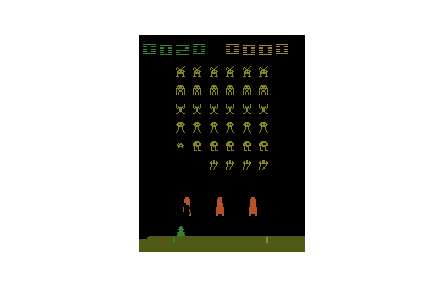
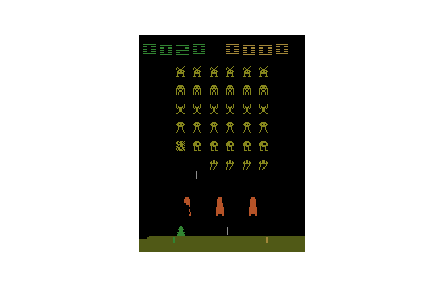
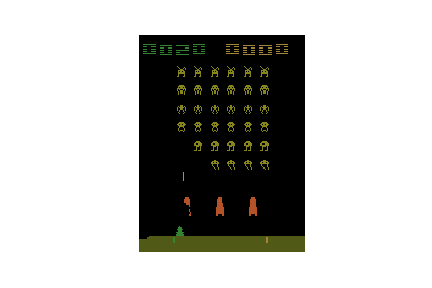
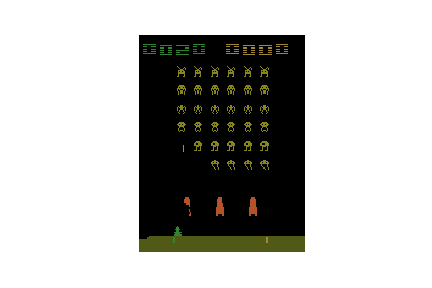
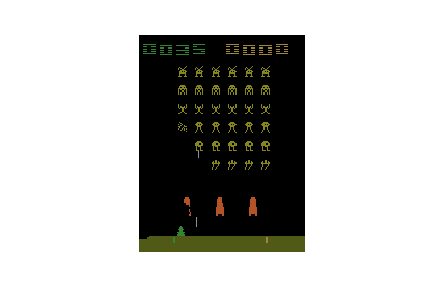
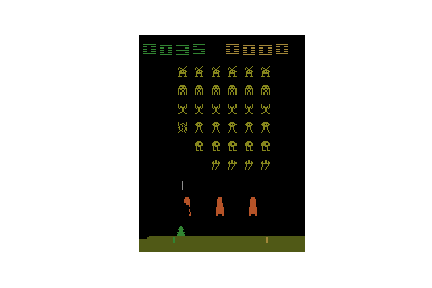
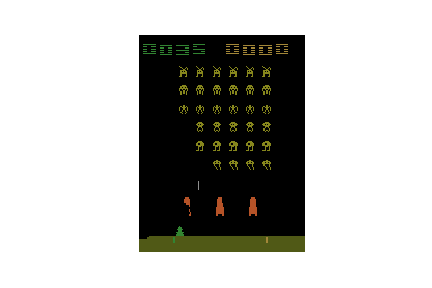
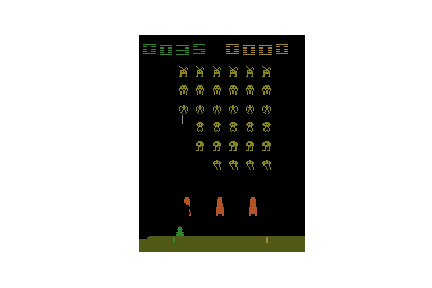
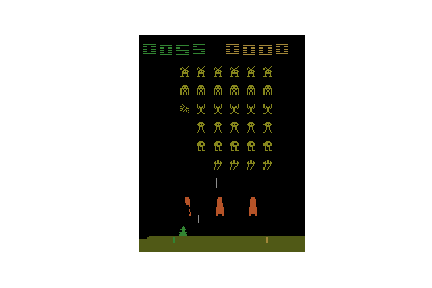
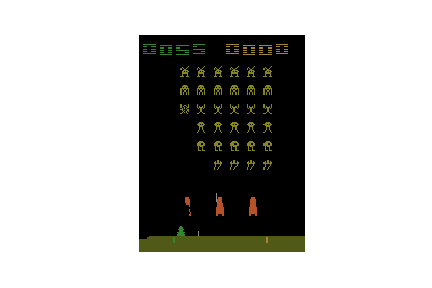
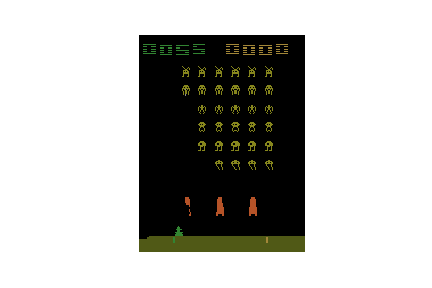
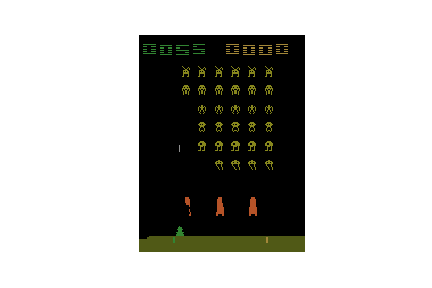
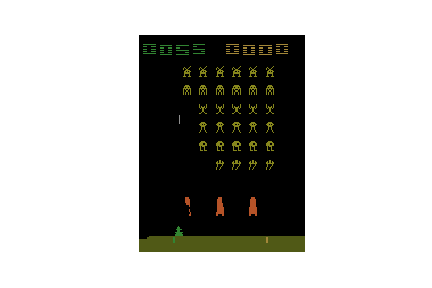
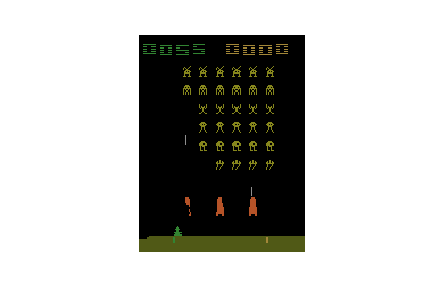
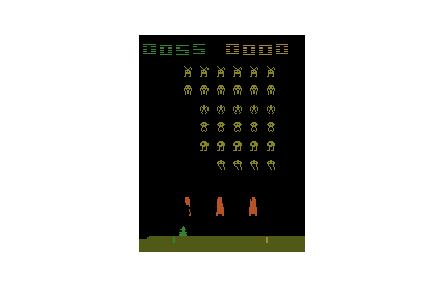
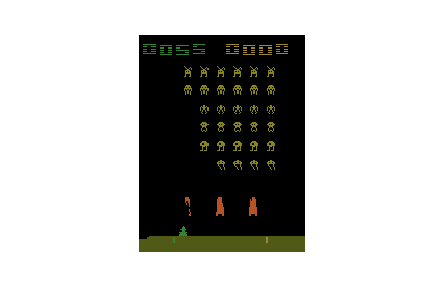
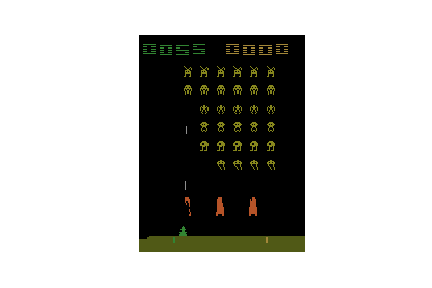
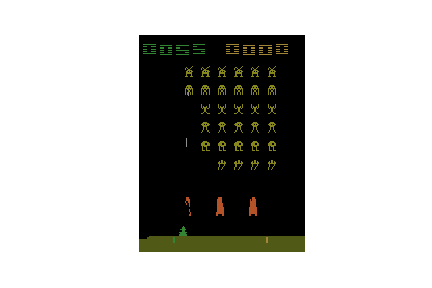
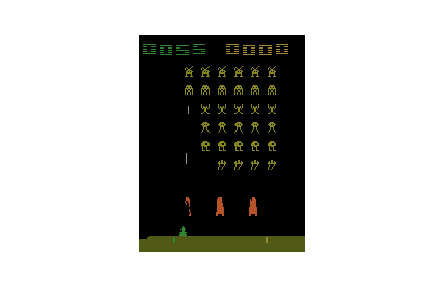
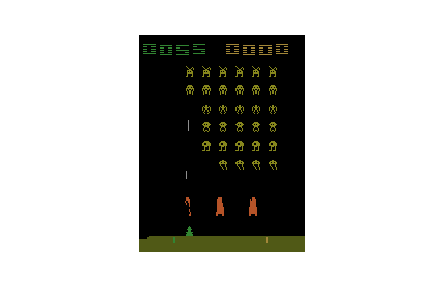
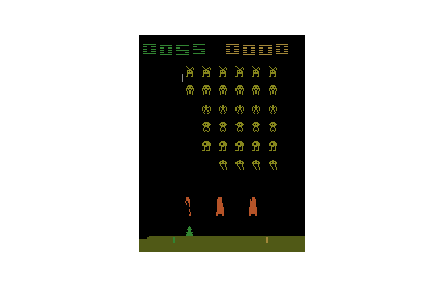
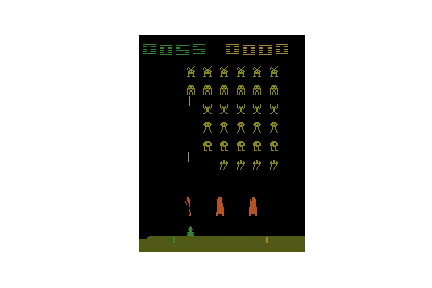
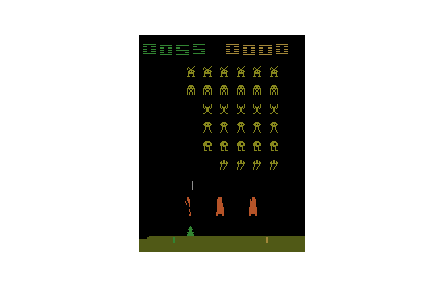
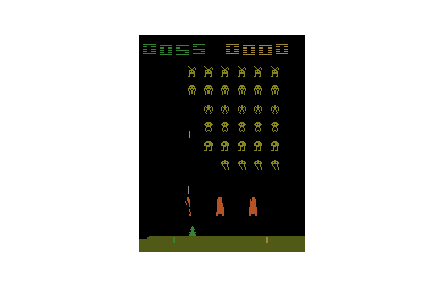
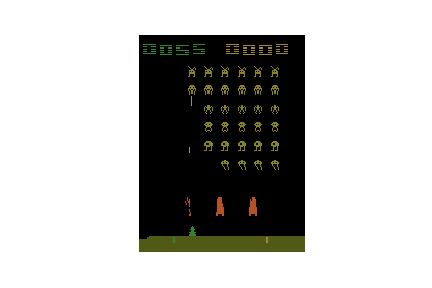
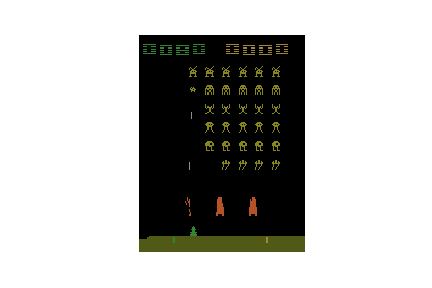
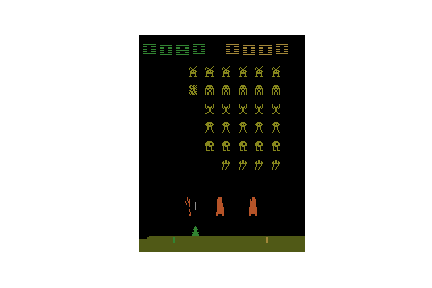
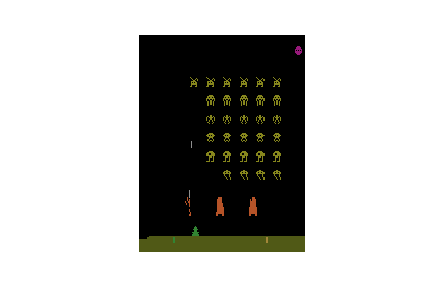
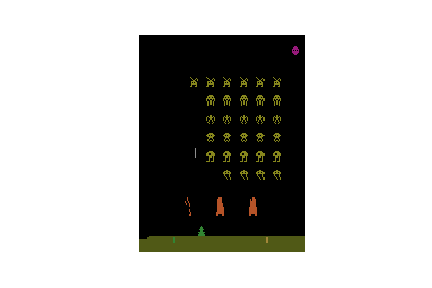
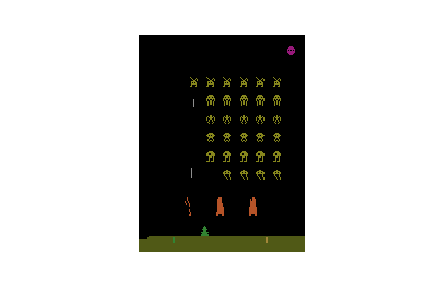
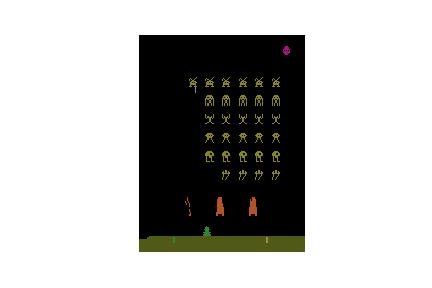
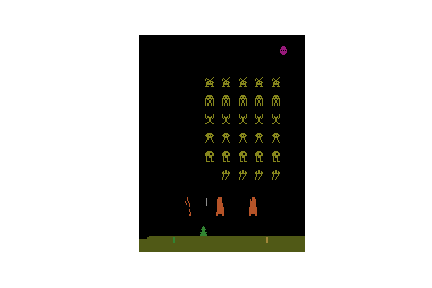
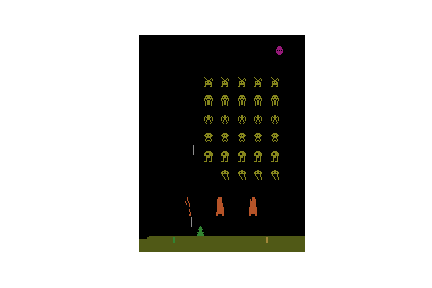
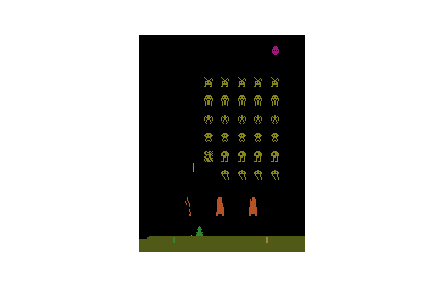
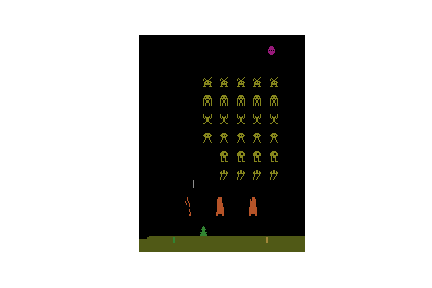
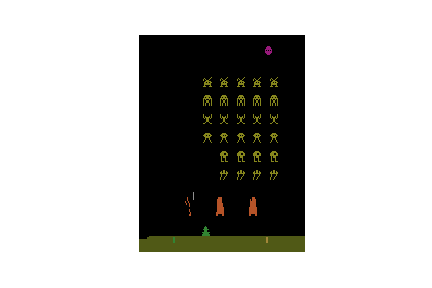
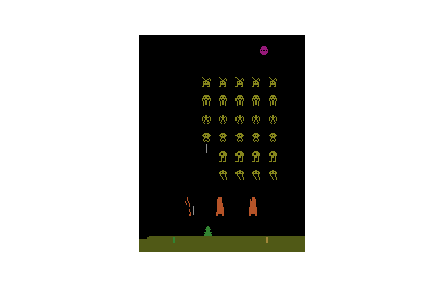
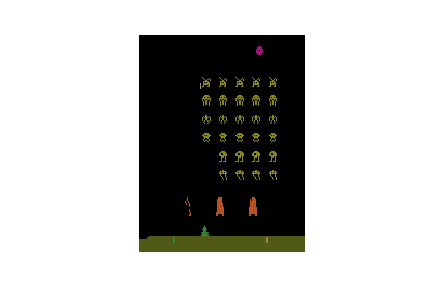
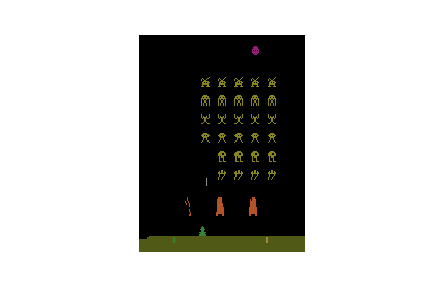
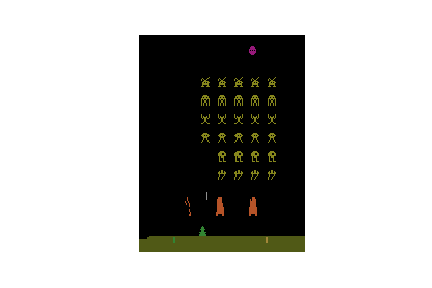
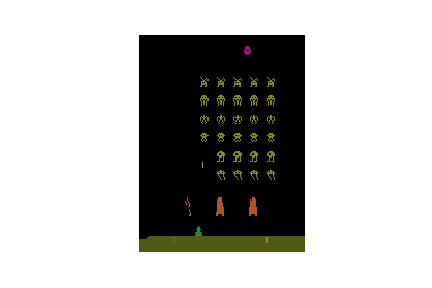
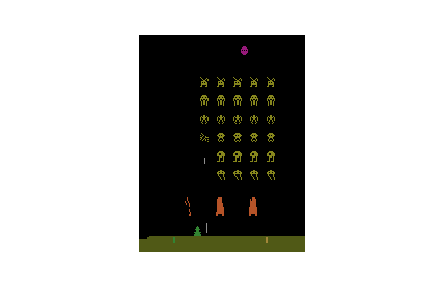
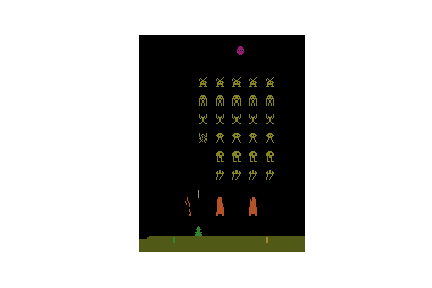
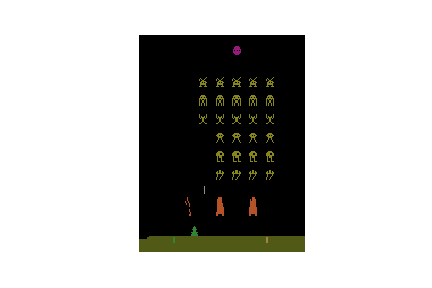
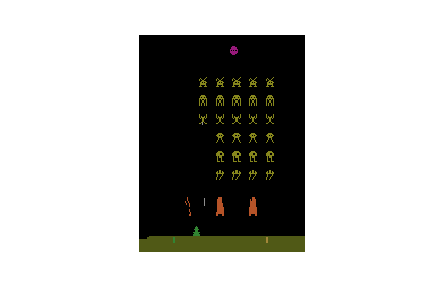
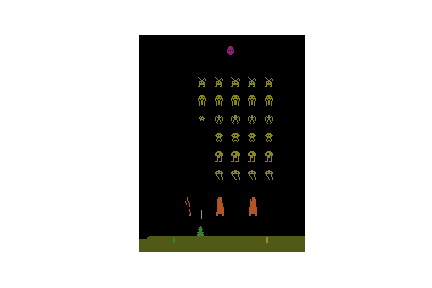
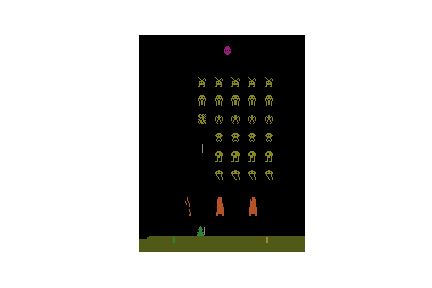
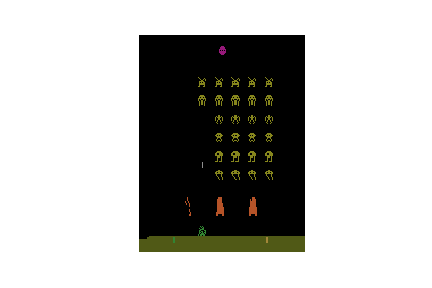
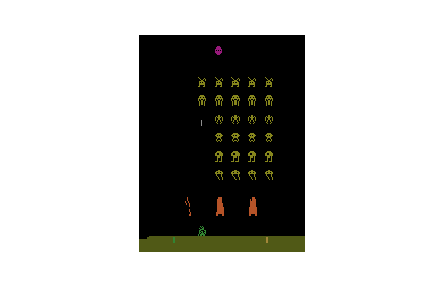
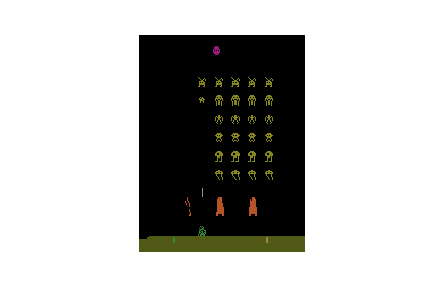
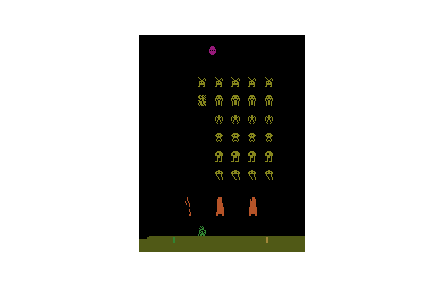
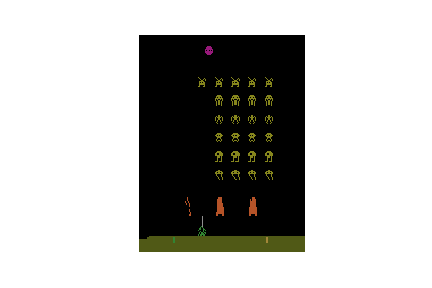
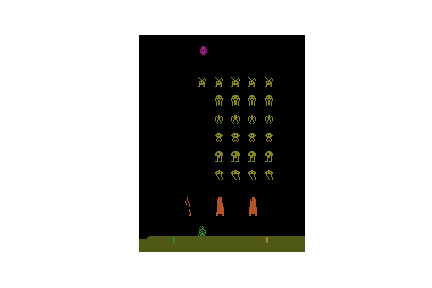
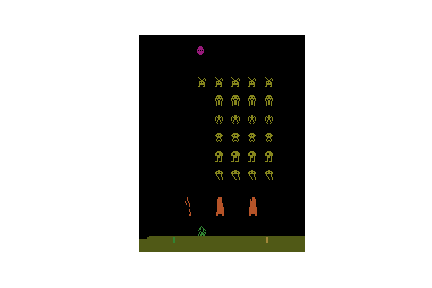
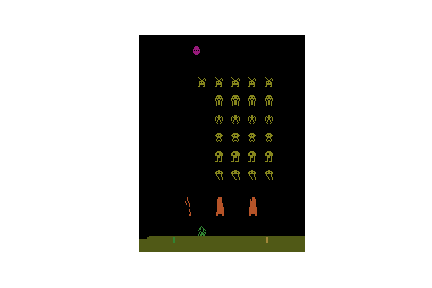
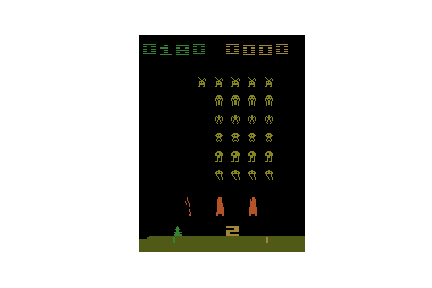
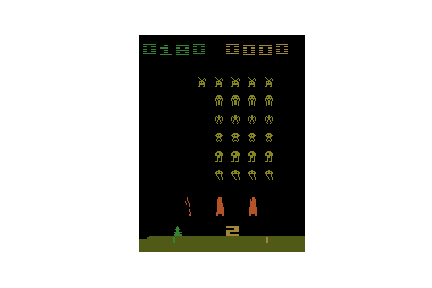
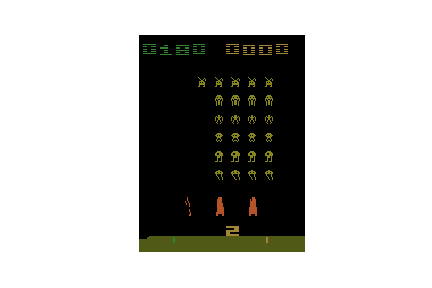
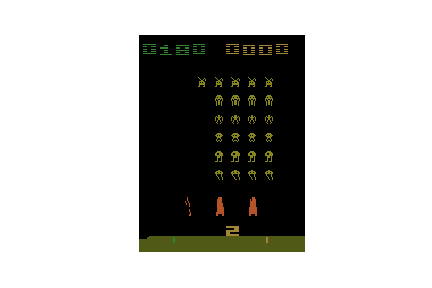
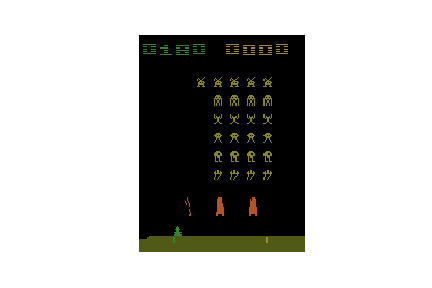
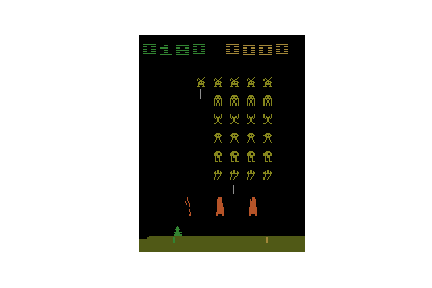
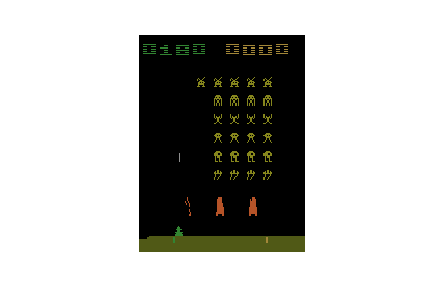
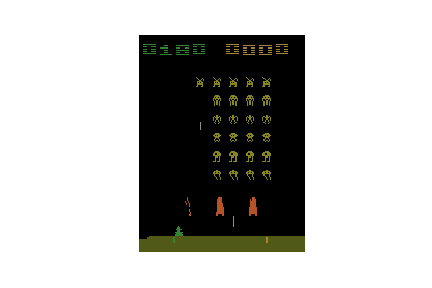
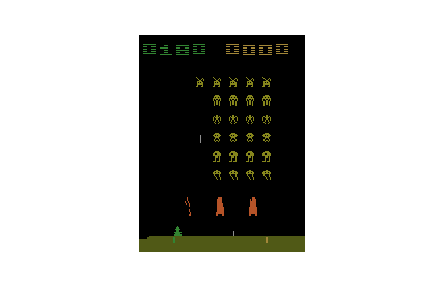
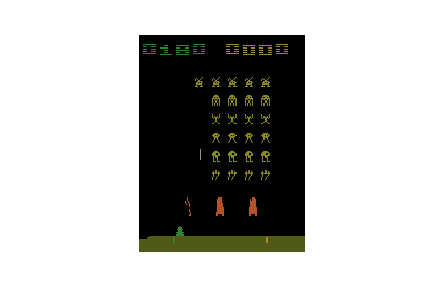
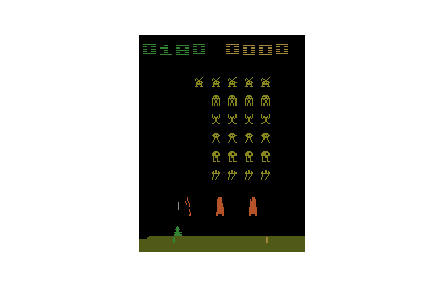
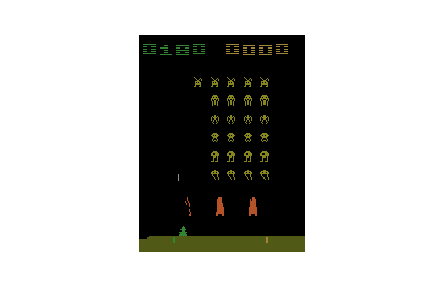
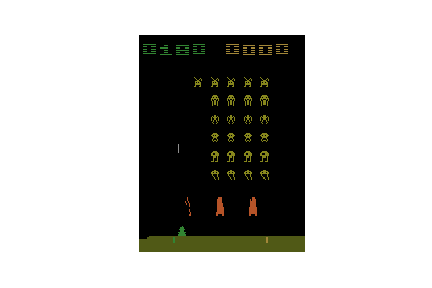
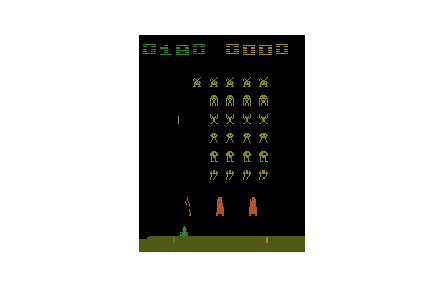
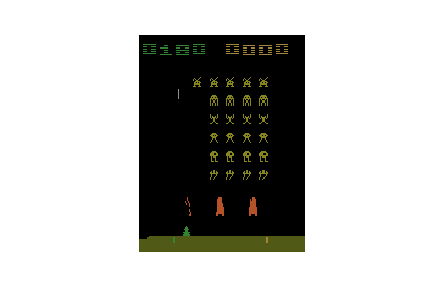
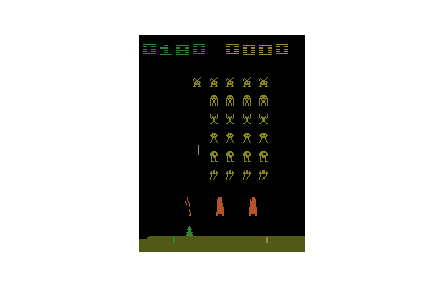
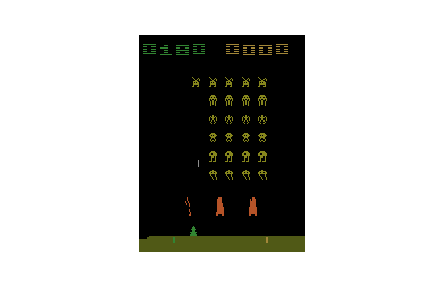
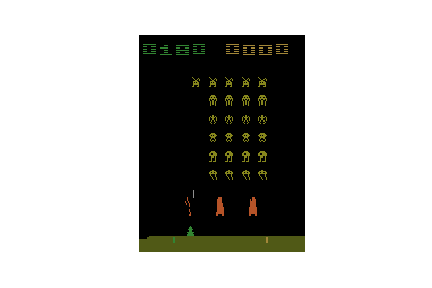
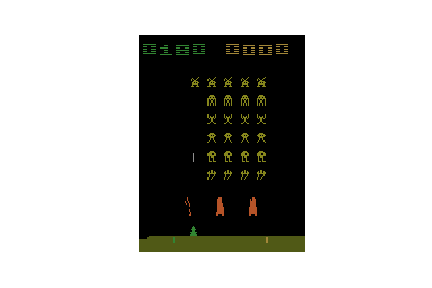
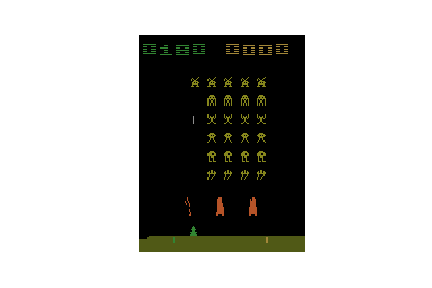
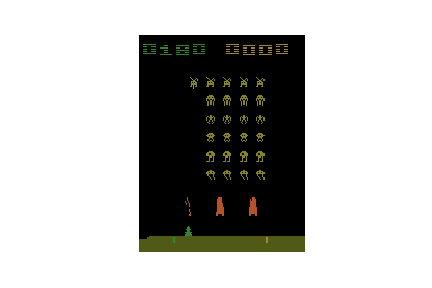
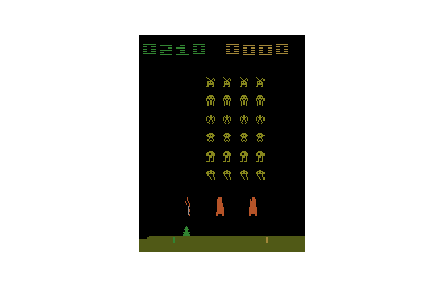
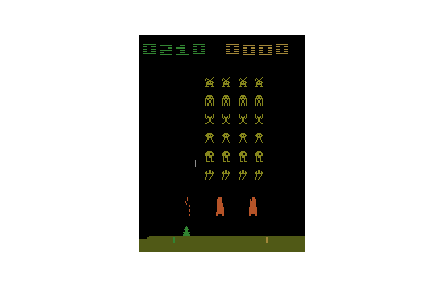
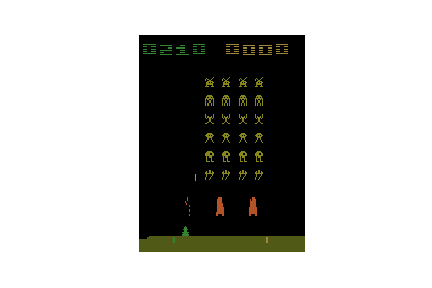
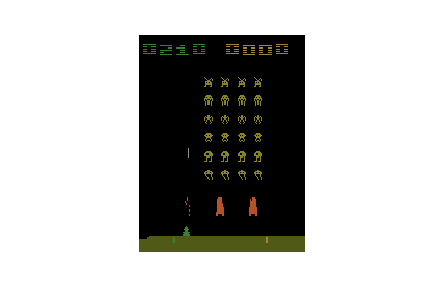
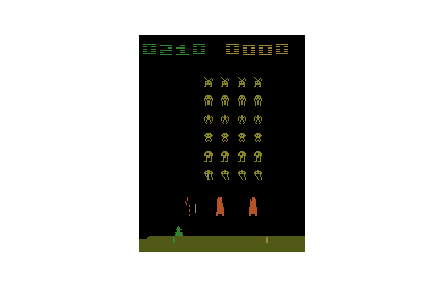
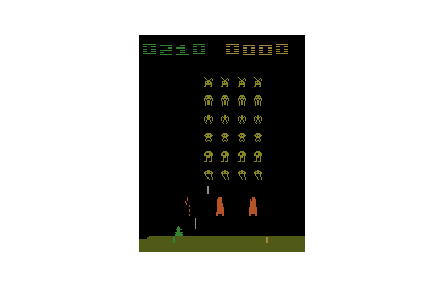
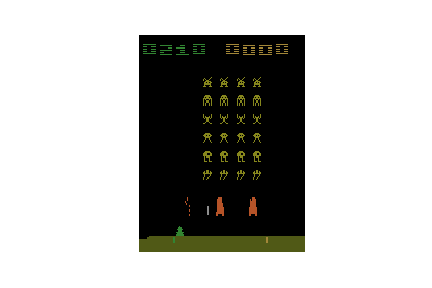
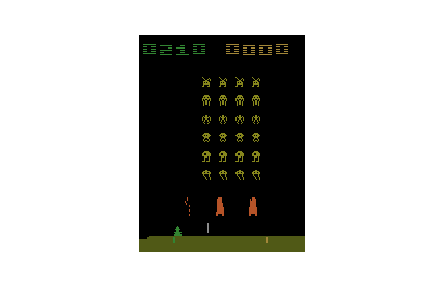
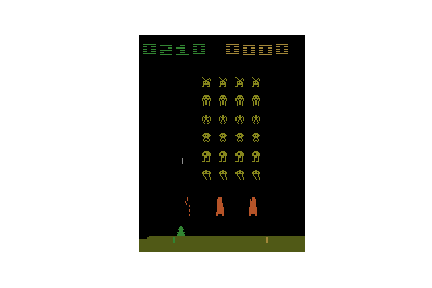
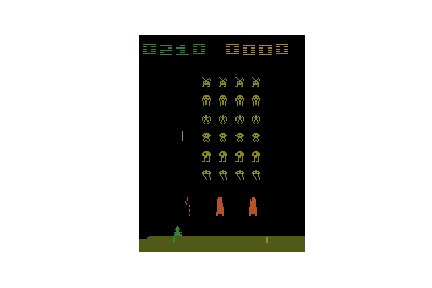
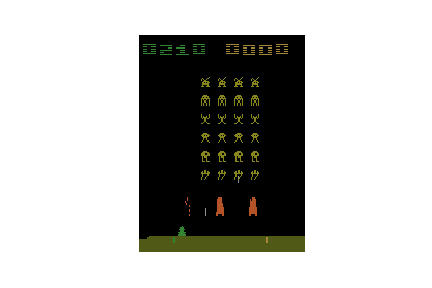
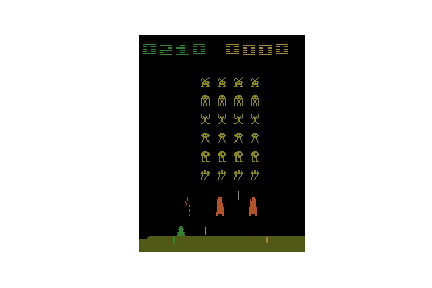
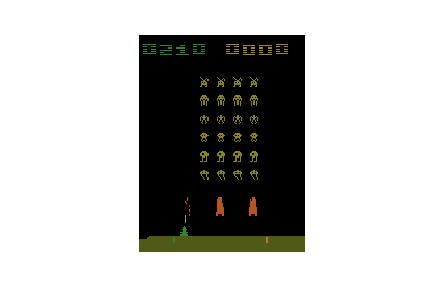
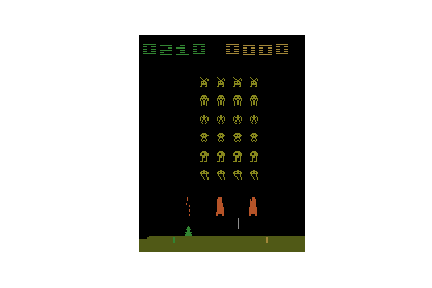
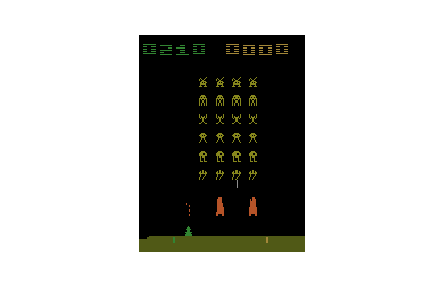
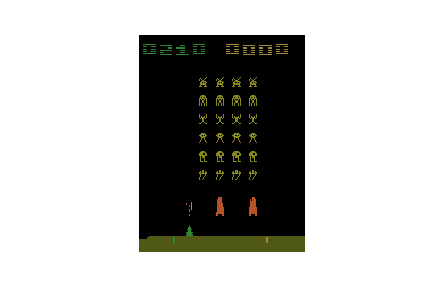
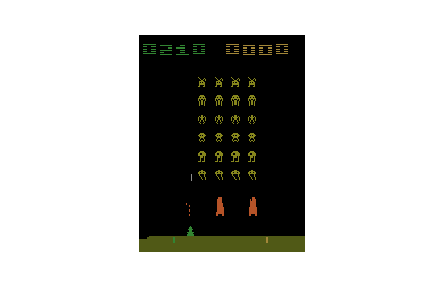
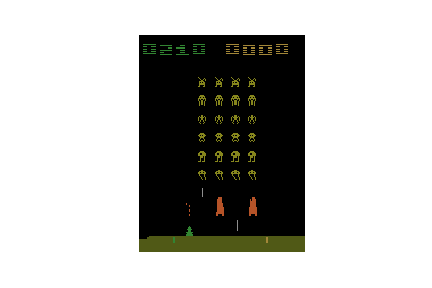
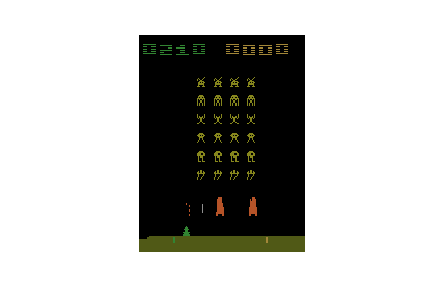
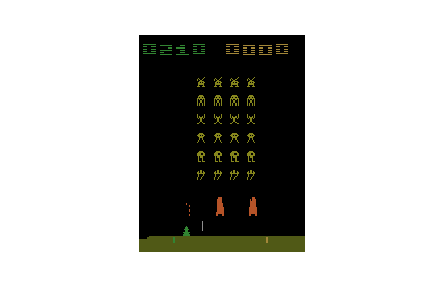
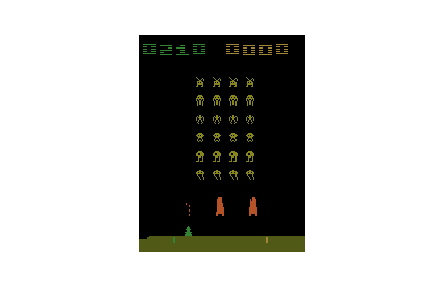
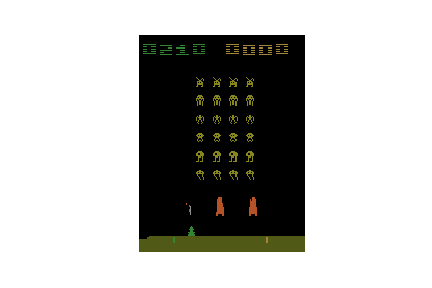
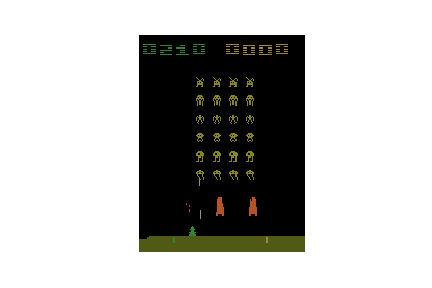
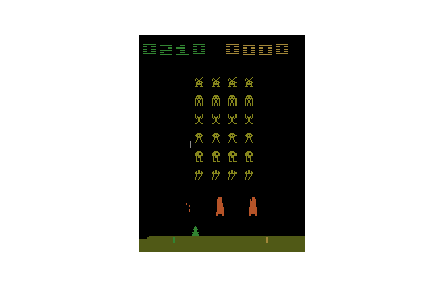
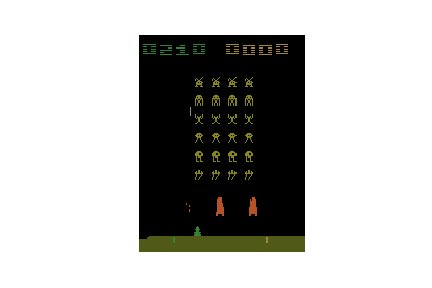
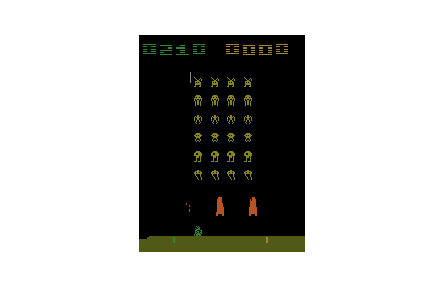
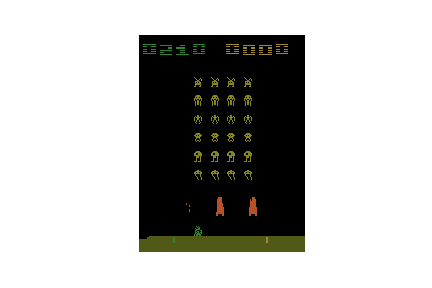
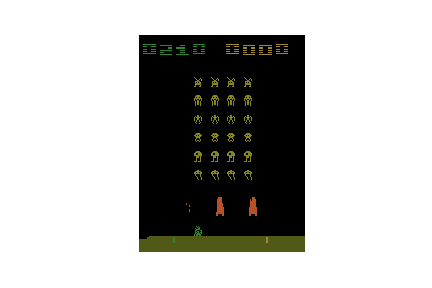
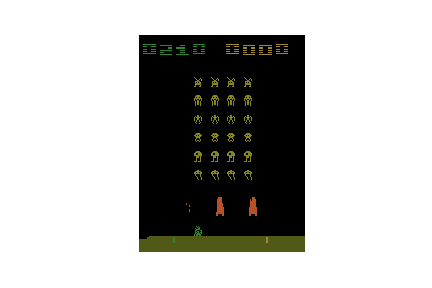
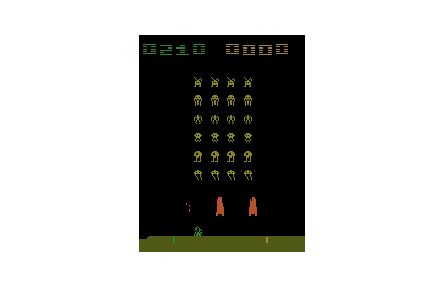
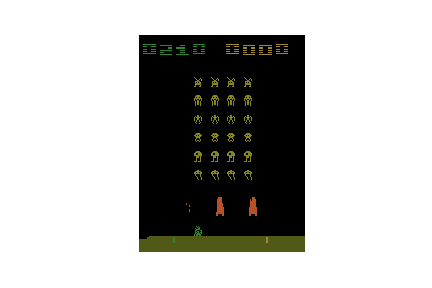
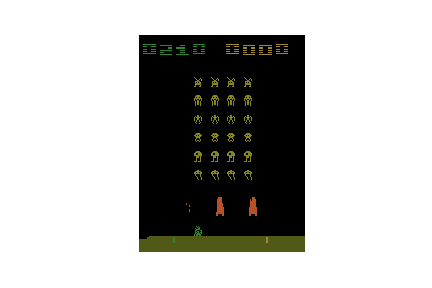
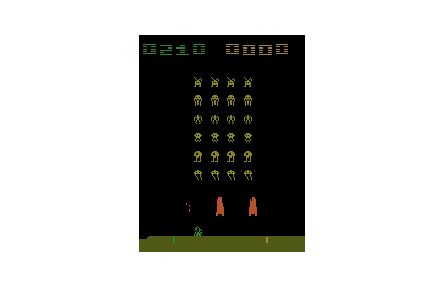
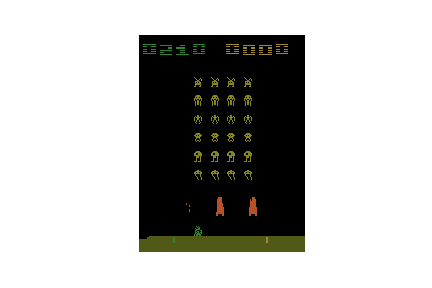
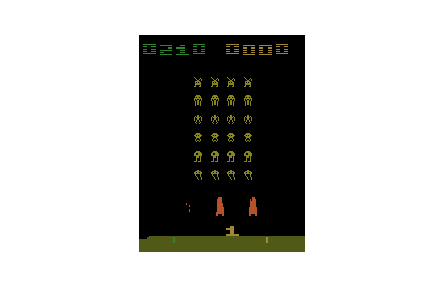
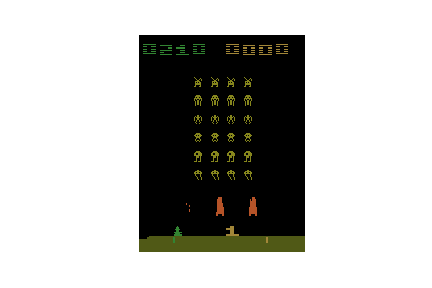
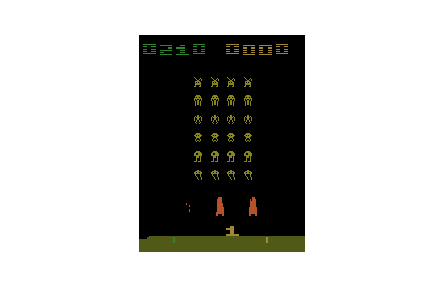
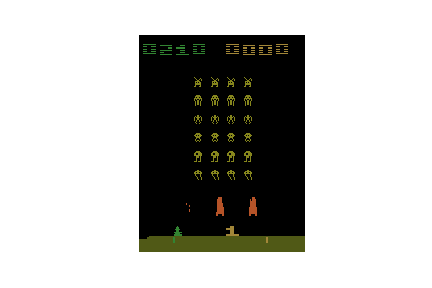
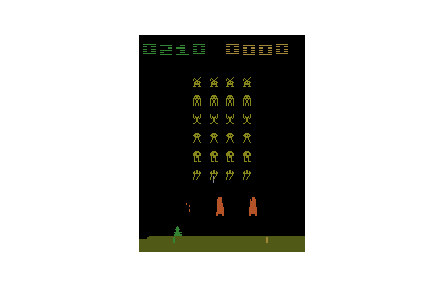
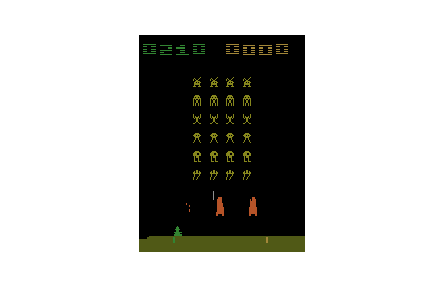
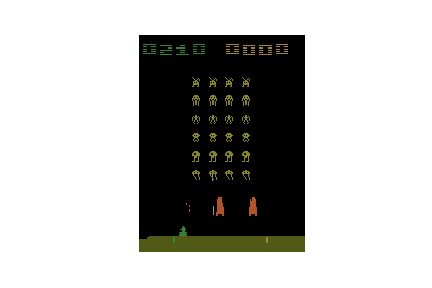
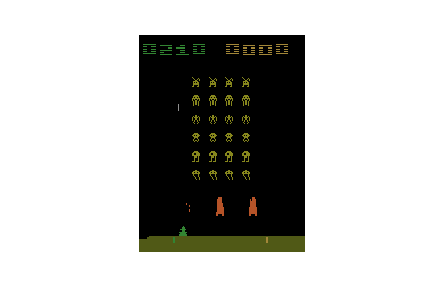
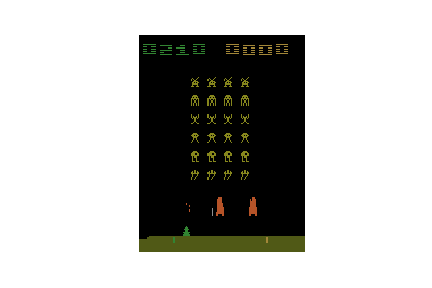
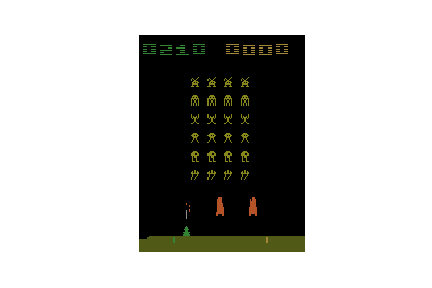
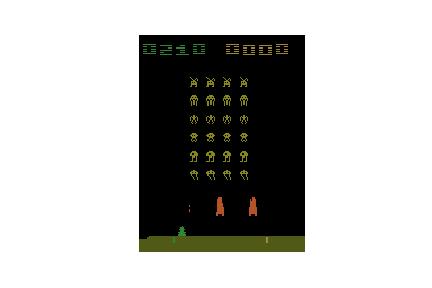
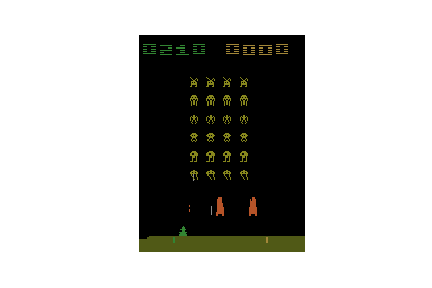
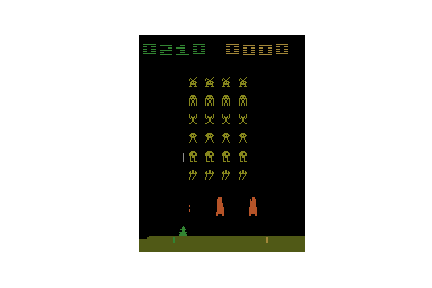
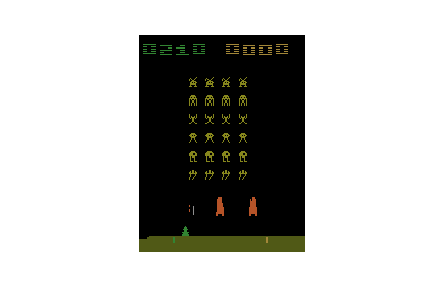
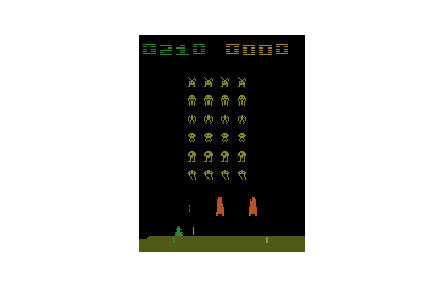
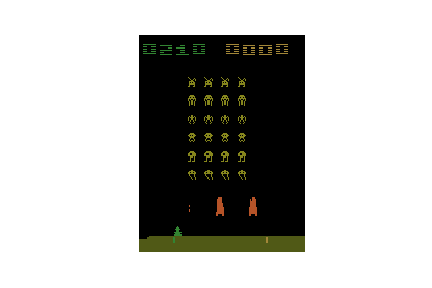
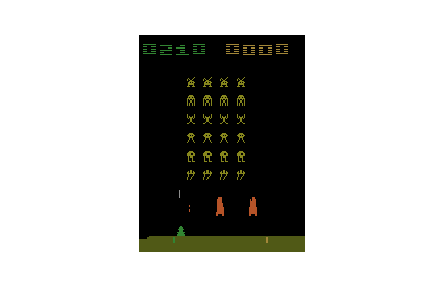
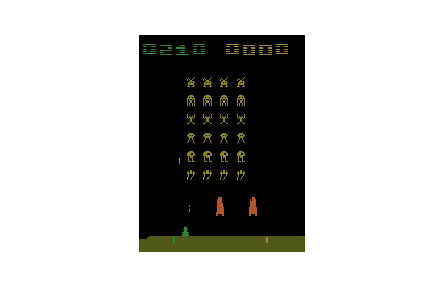
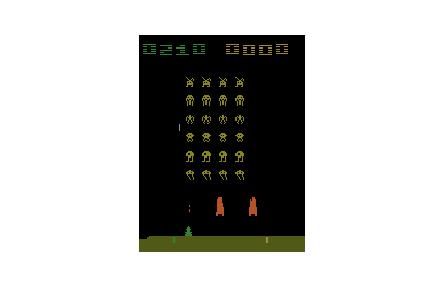
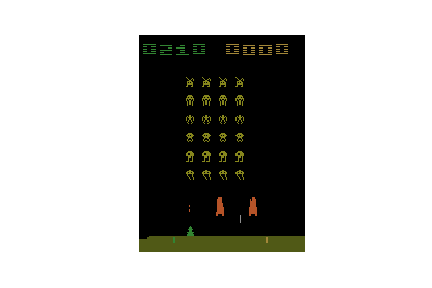
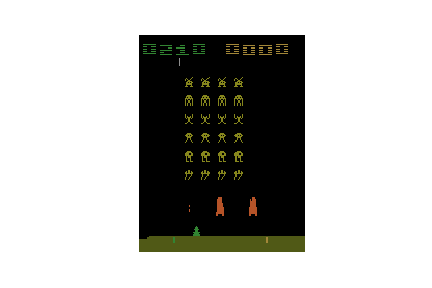
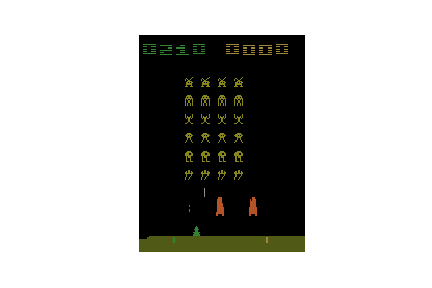
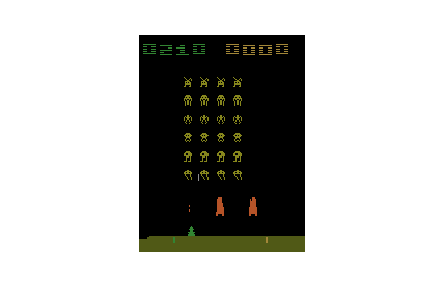
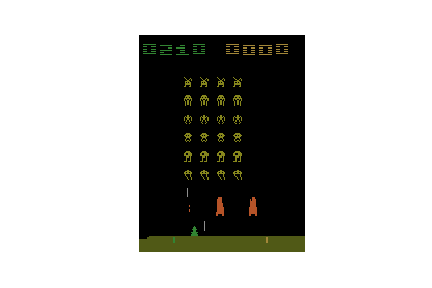
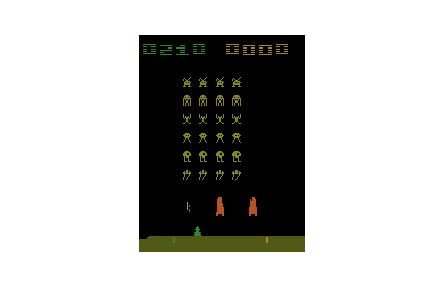
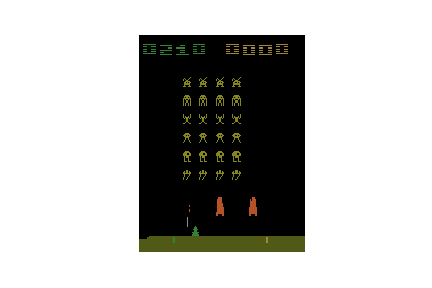
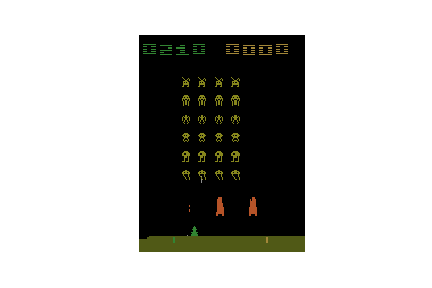
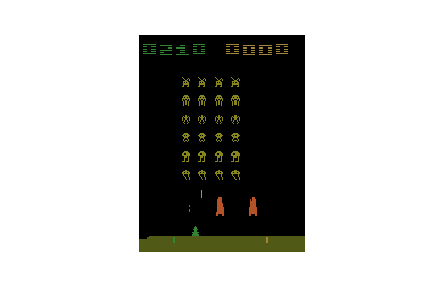
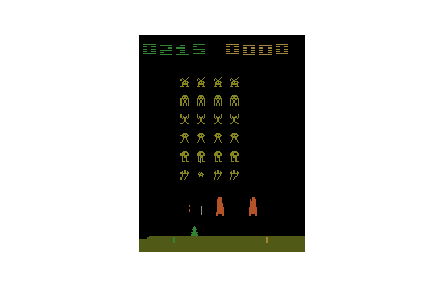
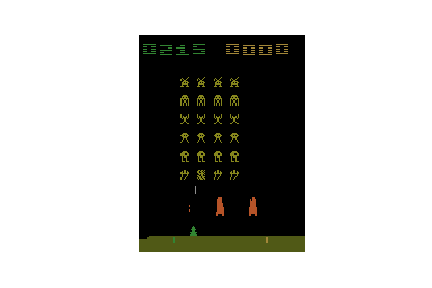
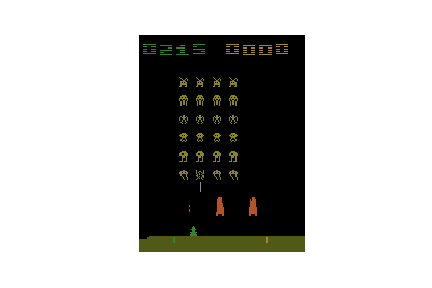
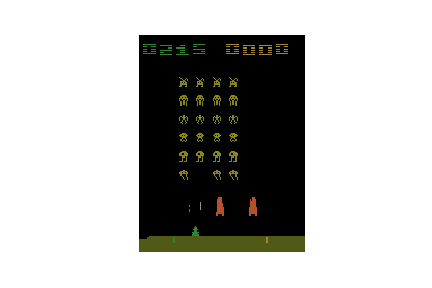
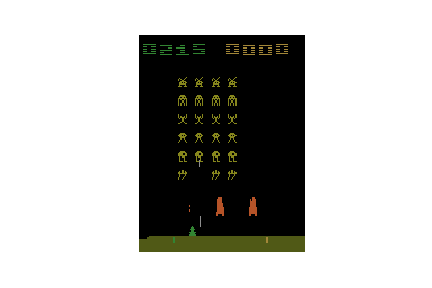
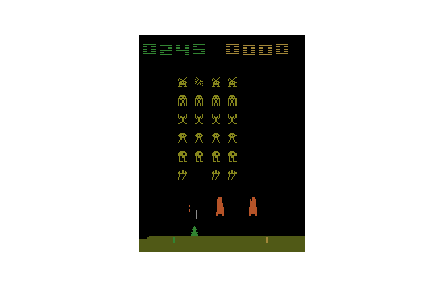
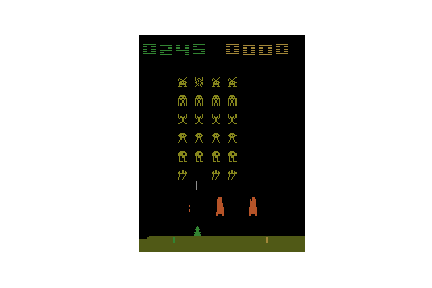
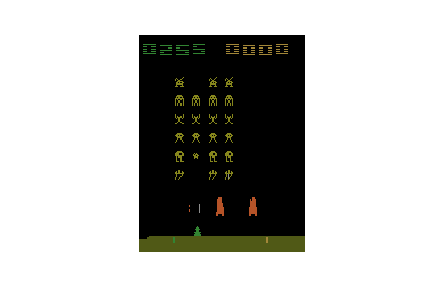
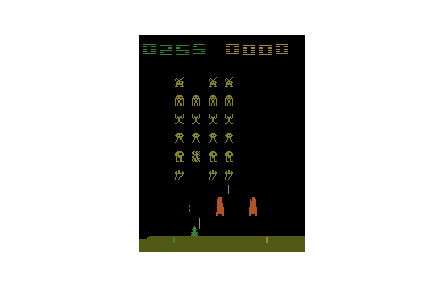
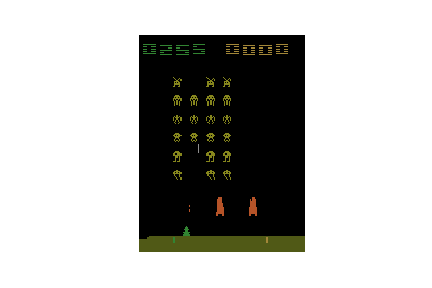
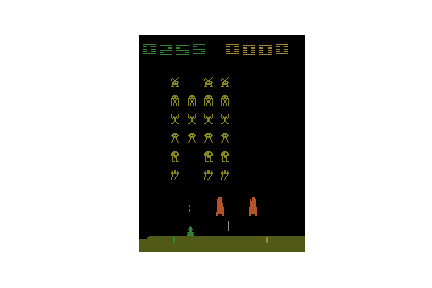
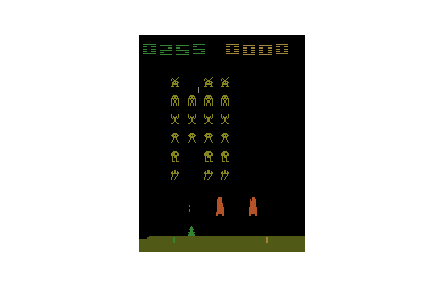
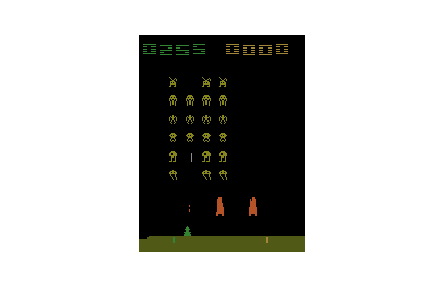
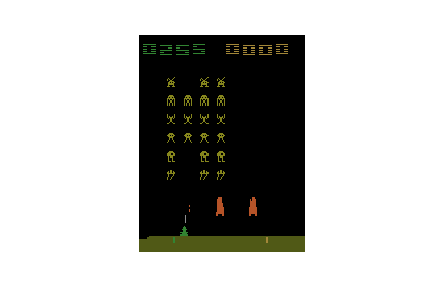
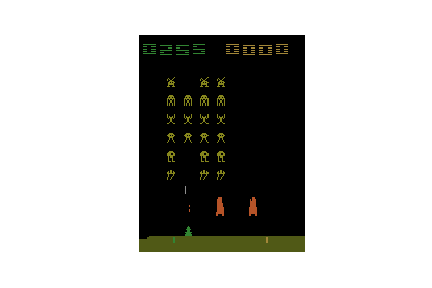
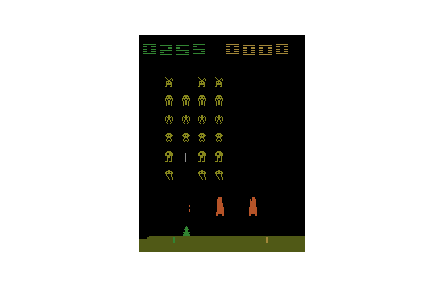
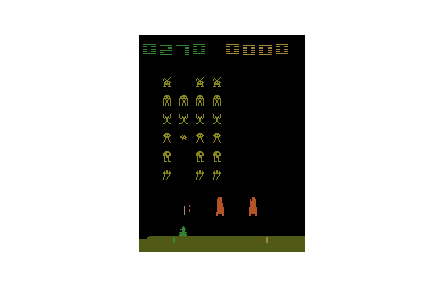
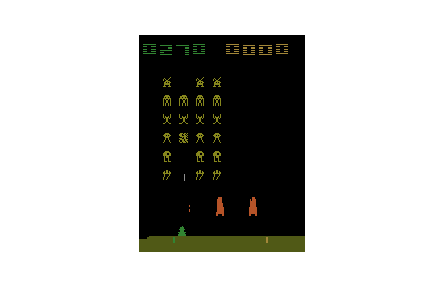
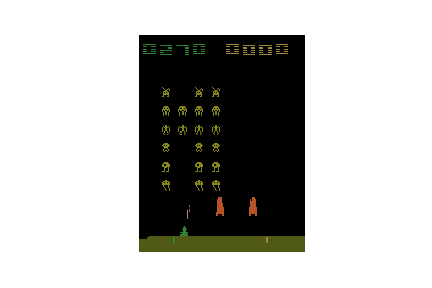
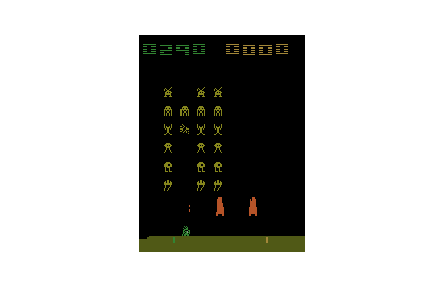
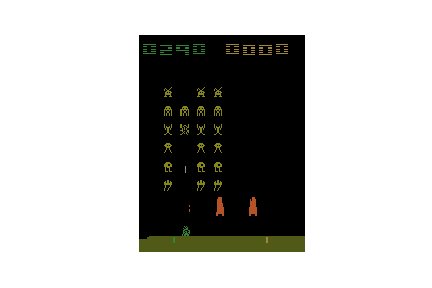
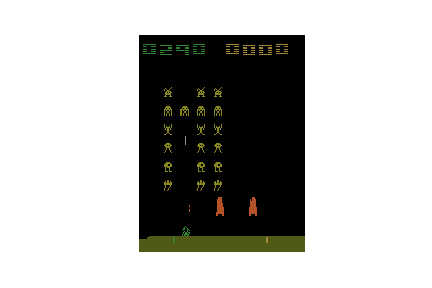
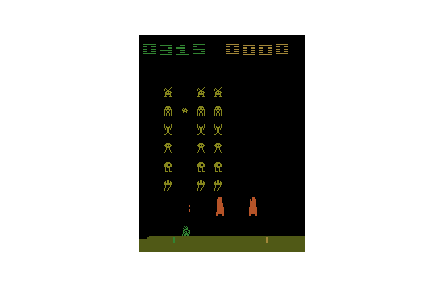
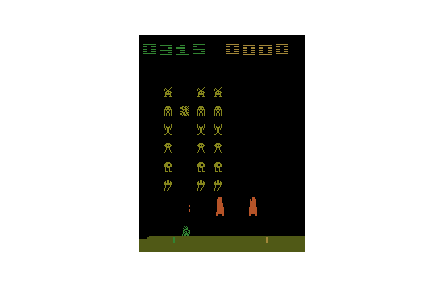
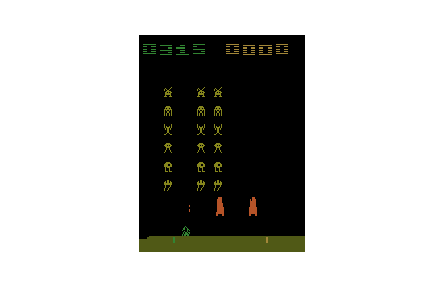
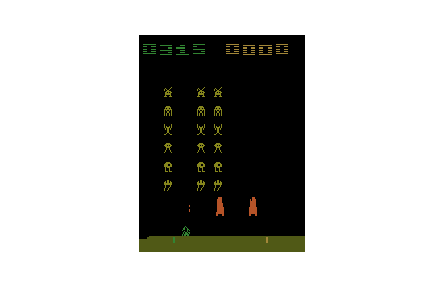
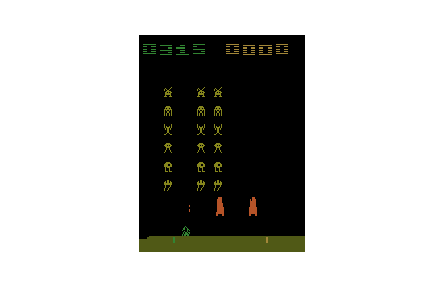
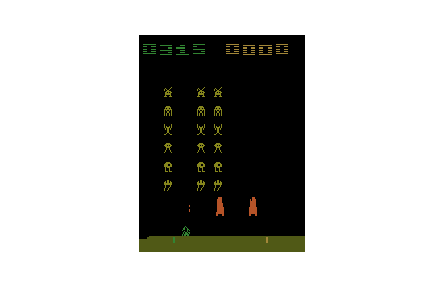
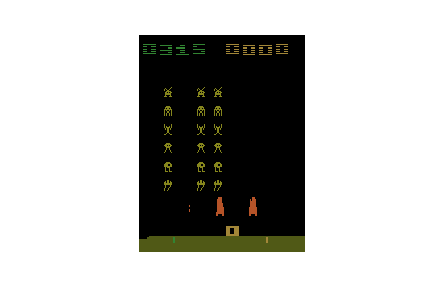

In [109]:
display_frames_as_gif(frames[::5])

In [96]:
 random.choice([1,2,3,4,5])

3